In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


# Qubit Temperature

## EF rabi with ge pulse 

[205.89867532   4.31663933 -76.45409671 -12.80406753]
Decay from avgi [us] -12.804067527411501
Rate [MHz] 4.3166393331190145
Pi length from avgi data [us]: 0.10711399660492928
	Pi/2 length from avgi data [us]: 0.049198571963843744
Fit params:  [205.89867532   4.31663933 -76.45409671 -12.80406753]

Decay from avgq [us] -87.56780882649008
Rate [MHz] 4.314144346217346
Pi length from avgq data [us]: 0.10692906015515544
Pi/2 length from avgq data [us]: 0.05346453007757772
Fit params:  [163.93143506   4.31414435 -76.07066411 -87.56780883]


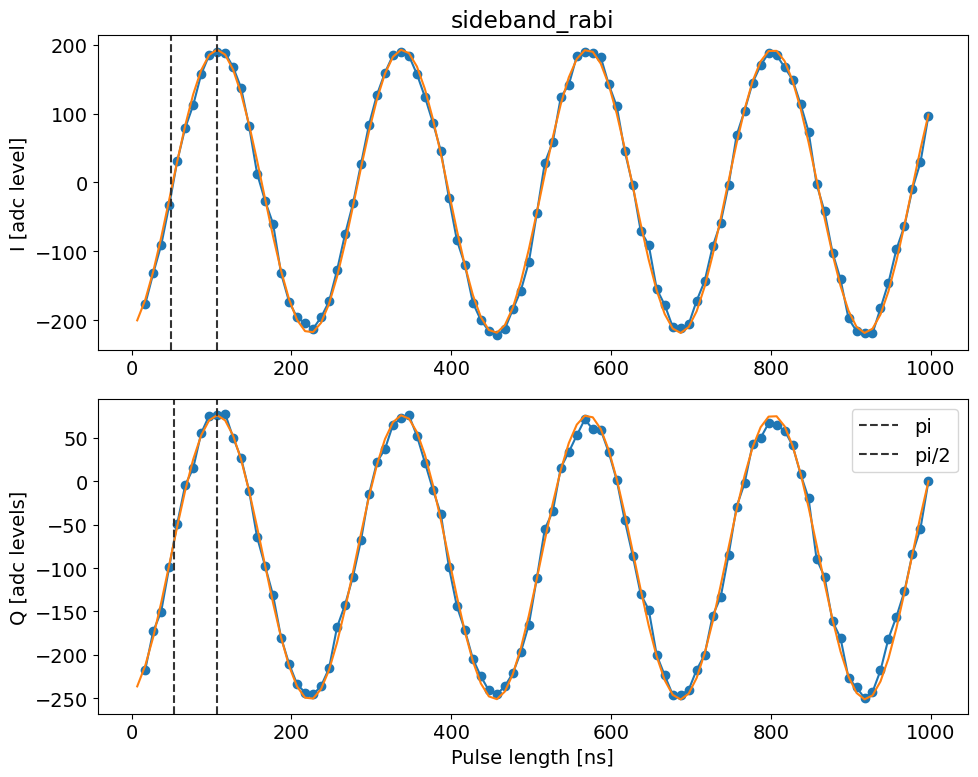

In [524]:
temp_data, attrs = prev_data(expt_path, '00000_LengthRabiGeneralExperiment.h5')
p, pCov, xlist1, Ilist1 = length_rabi_display(temp_data, fit=True, fit_sin = True, # fitparams=[300, None, None, None, None, None], title='length rabi qubit', 
                    vlines = [], active_reset=False, return_fit_params=True)

In [526]:
p

array([205.89867532,   4.31663933, -76.45409671, -12.80406753])

In [527]:
amp1 = np.copy(p[0])
amp1_err = np.copy(np.sqrt(pCov[0,0]))

## EF rabi without ge pulse 

[  3.27245552   4.2574426  -64.79622523 179.53787968]
Decay from avgi [us] 179.53787967589554
Rate [MHz] 4.2574425975621555
Pi length from avgi data [us]: 0.10099713728696735
	Pi/2 length from avgi data [us]: 0.04227643952743633
Fit params:  [  3.27245552   4.2574426  -64.79622523 179.53787968]

Decay from avgq [us] -272.1403646638626
Rate [MHz] 4.338798332262482
Pi length from avgq data [us]: 0.1025327850622087
Pi/2 length from avgq data [us]: 0.05126639253110435
Fit params:  [   2.44353052    4.33879833  -70.15286766 -272.14036466]


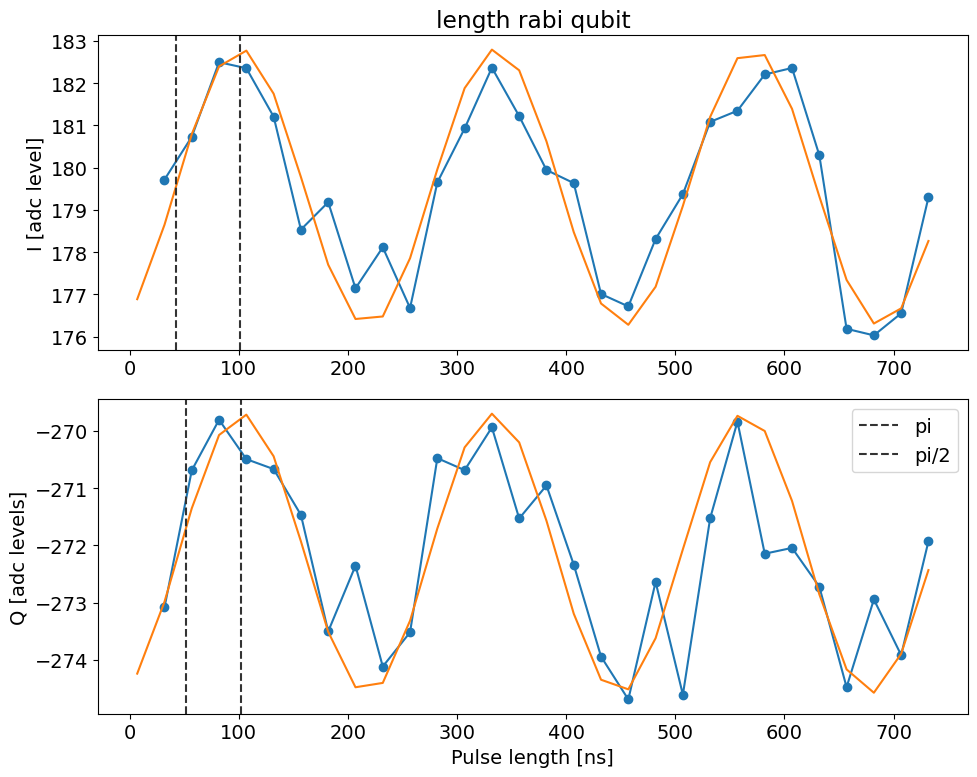

In [528]:
temp_data, attrs = prev_data(expt_path, '00003_LengthRabiGeneralExperiment.h5')
p, pCov, xlist2, Ilist2 = length_rabi_display(temp_data, fit=True, fit_sin = True, fitparams=None, title='length rabi qubit', 
                    vlines = [], active_reset=False, return_fit_params=True)

In [537]:
pCov

array([[ 5.92759979e-02,  1.76223459e-04,  2.40403313e-02,
         2.08001385e-03],
       [ 1.76223459e-04,  2.88778044e-03, -3.79370865e-01,
         1.07400805e-03],
       [ 2.40403313e-02, -3.79370865e-01,  6.76250045e+01,
        -1.85420502e-01],
       [ 2.08001385e-03,  1.07400805e-03, -1.85420502e-01,
         2.97453806e-02]])

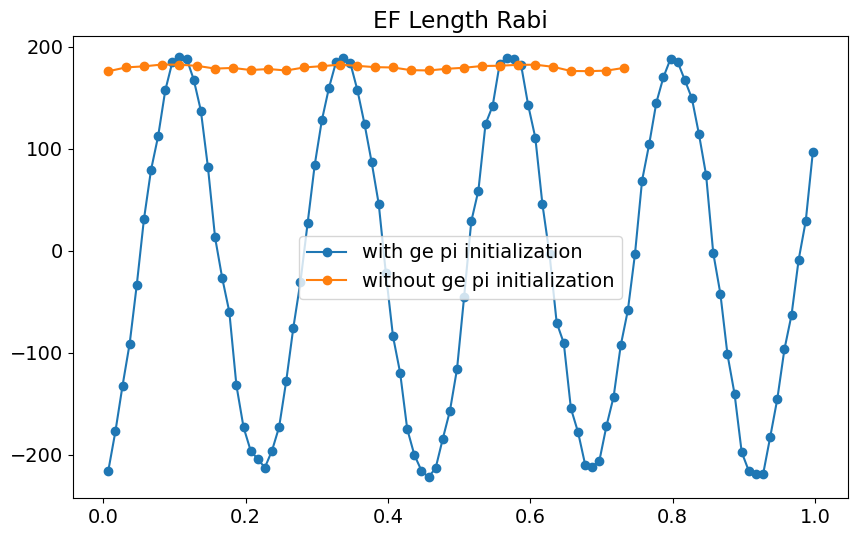

In [530]:
plt.plot(xlist1, Ilist1, 'o-', label = 'with ge pi initialization')
plt.plot(xlist2, Ilist2,'o-', label = 'without ge pi initialization')
plt.title('EF Length Rabi')
plt.legend()

In [531]:
amp2 = p[0]
amp2_err = np.sqrt(pCov[0,0])

In [539]:
amp_with_ge = amp1 #max(Ilist1) - min(Ilist1)
amp_without_ge = amp2 #max(Ilist2) - min(Ilist2)
print(f'With GE: {amp_with_ge} ± {amp1_err}')
print(f'Without GE: {amp_without_ge} ± {amp2_err}')

With GE: 205.89867532467534 ± 1.288737790696627
Without GE: 3.2724555194805167 ± 0.24346662575853428


In [553]:
n_th = amp_without_ge / amp_with_ge
n_th_err = n_th * np.sqrt((amp1_err/amp_with_ge)**2 + (amp2_err/amp_without_ge)**2)
freq = attrs['config']['device']['qubit']['f_ge'][0] *1e-3 # in Ghz
freq_to_mK = 48 # 1Ghz = 48mK
freq_temp = freq * freq_to_mK
temp_th = freq_temp / np.log((n_th + 1)/n_th)

err_on_fraction = np.sqrt( (n_th_err/n_th)**2  + (n_th_err/(n_th + 1))**2)
err_on_log = err_on_fraction / ((n_th + 1)/n_th)

temp_th_err = temp_th * err_on_log/ np.log((n_th + 1)/n_th)


print(f'temp_th (mK): {np.round(temp_th, 3)} ± {np.round(temp_th_err, 3)}')
print(f'n_th (%):  {np.round(n_th * 100, 2)} +/- {np.round(n_th_err * 100, 2)}')

temp_th (mK): 41.195 ± 0.012
n_th (%):  1.59 +/- 0.12


In [545]:
n_th_err

0.0011866355872923967

In [541]:
amp1_err/amp_with_ge

0.006259087333439401

In [542]:
amp2_err/amp_without_ge# n_th

0.07439875784688532

## Ef ramsey

Current pi pulse frequency: 3425.5564066067
Fit frequency from I [MHz]: 0.20180791678768745 +/- 0.0002968599514706458
Suggested new pi pulse frequency from fit I [MHz]:
 	3425.5545986899124
 	3425.9582145234876
T2 Ramsey from fit I [us]: 49.60589118278579
Fit frequency from Q [MHz]: 0.2020343228802794 +/- 0.00033918896599770645
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3425.5543722838197
 	3425.9584409295803
T2 Ramsey from fit Q [us]: 47.41265342245432


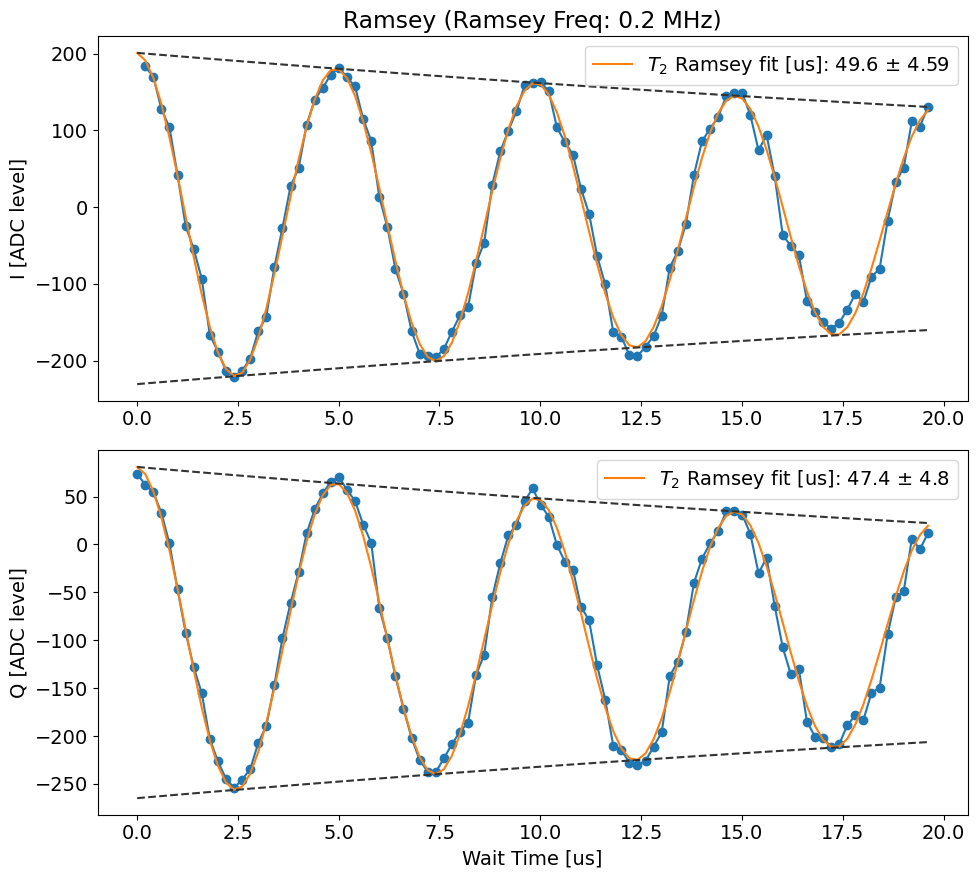

In [98]:
temp_data, attrs = prev_data(expt_path, '00021_RamseyExperiment.h5')

p, pCov, xdata_, idata = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ef_idle'][0], fit=True,fitparams=None, #[1000, 0.2, None, None, None, None],
                  return_all_param=True,  title='Ramsey')

## EF ramsey without initial ge pulse

Current pi pulse frequency: 3425.5564066067
Fit frequency from I [MHz]: 0.1985335420519609 +/- 0.004547027163001125
Suggested new pi pulse frequency from fit I [MHz]:
 	3425.557873064648
 	3425.954940148752
T2 Ramsey from fit I [us]: 28.1707134635878
Fit frequency from Q [MHz]: 0.19625186915555512 +/- 0.004870018051468021
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3425.5601547375445
 	3425.9526584758555
T2 Ramsey from fit Q [us]: 22.434045914430868


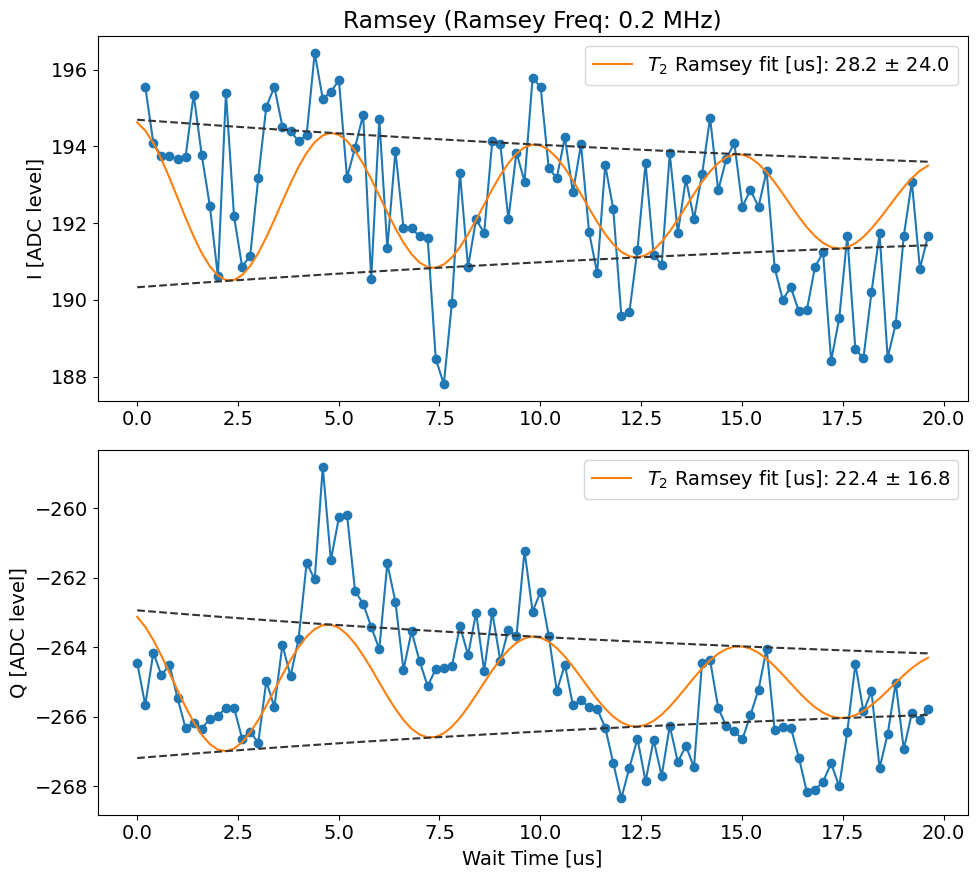

In [99]:
temp_data, attrs = prev_data(expt_path, '00023_RamseyExperiment.h5')

p_p, pCov_p, xdata_p, idata_p = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ef_idle'][0], fit=True,fitparams=None, #[1000, 0.2, None, None, None, None],
                  return_all_param=True,  title='Ramsey')

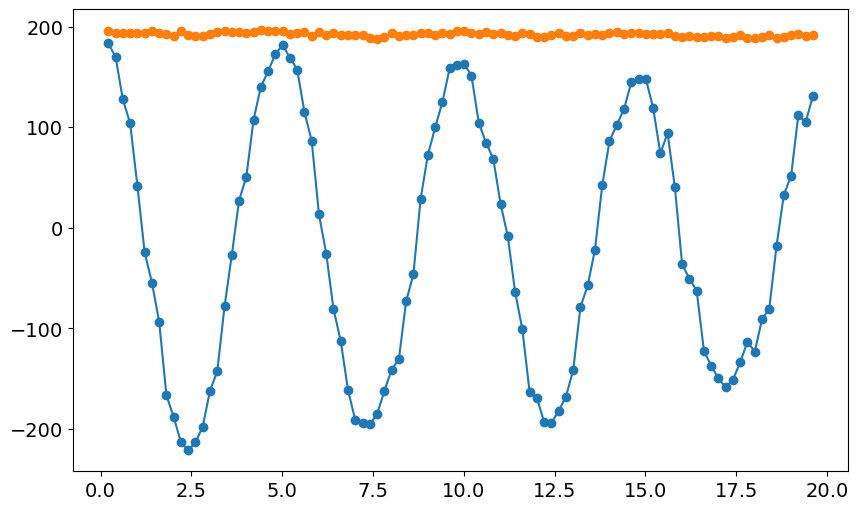

In [101]:
plt.plot(xdata_, idata, '-o', label='With ge initial pulse')
plt.plot(xdata_p, idata_p, '-o', label='Without ge initial pulse')

In [84]:
attrs['config']['expt']

{'start': 0.01,
 'step': 0.2,
 'expts': 100,
 'ramsey_freq': 0.2,
 'reps': 500,
 'rounds': 1,
 'qubits': [0],
 'checkEF': True,
 'user_defined_freq': [False, 3425.30098176373, 7575, 0.035],
 'qubit_ge_init': True,
 'qubit_ge_after': True,
 'f0g1_cavity': 0,
 'normalize': False,
 'active_reset': False,
 'man_reset': True,
 'storage_reset': False,
 'prepulse': False,
 'postpulse': False,
 'pre_active_reset_pulse': False,
 'pre_active_reset_sweep_pulse': [[3568.1751638611518,
   3425.5564066067,
   2007.0],
  [10716, 8236, 15000],
  [0, 0, 0.6056817916987671],
  [0, 0, 0],
  [2, 2, 0],
  ['g', 'g', 'flat_top'],
  [0.035, 0.035, 0.005]],
 'pre_sweep_pulse': [[3568.1751638611518,
   3425.5537944060666,
   2007.06,
   349.415],
  [10819, 8327, 15000, 3000],
  [0, 0, 0.6552866896346518, 0.973722],
  [0, 0, 0, 0],
  [2, 2, 0, 1],
  ['gaussian', 'gaussian', 'flat_top', 'flat_top'],
  [0.035, 0.035, 0.005, 0.005]],
 'reps_middlepulse': 0,
 'advance_phase': 0,
 'middlepulse': False,
 'mid_sweep_p

# Cavity Temperature

Attempted to init fitparam 1 to 0.05862646566164155, which is out of bounds 0.00020990764063811925 to 0.031486146095717885. Instead init to 0.015848026868178003
Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.028866986116808747 +/- 3.163712070395625e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.1527283366436
 	3568.210462308877
T2 Ramsey from fit I [us]: 269.4712912912402
Fit frequency from Q [MHz]: 0.028817485225317862 +/- 4.849308299332867e-05
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.1527778375353
 	3568.210412807986
T2 Ramsey from fit Q [us]: 938.687760140773


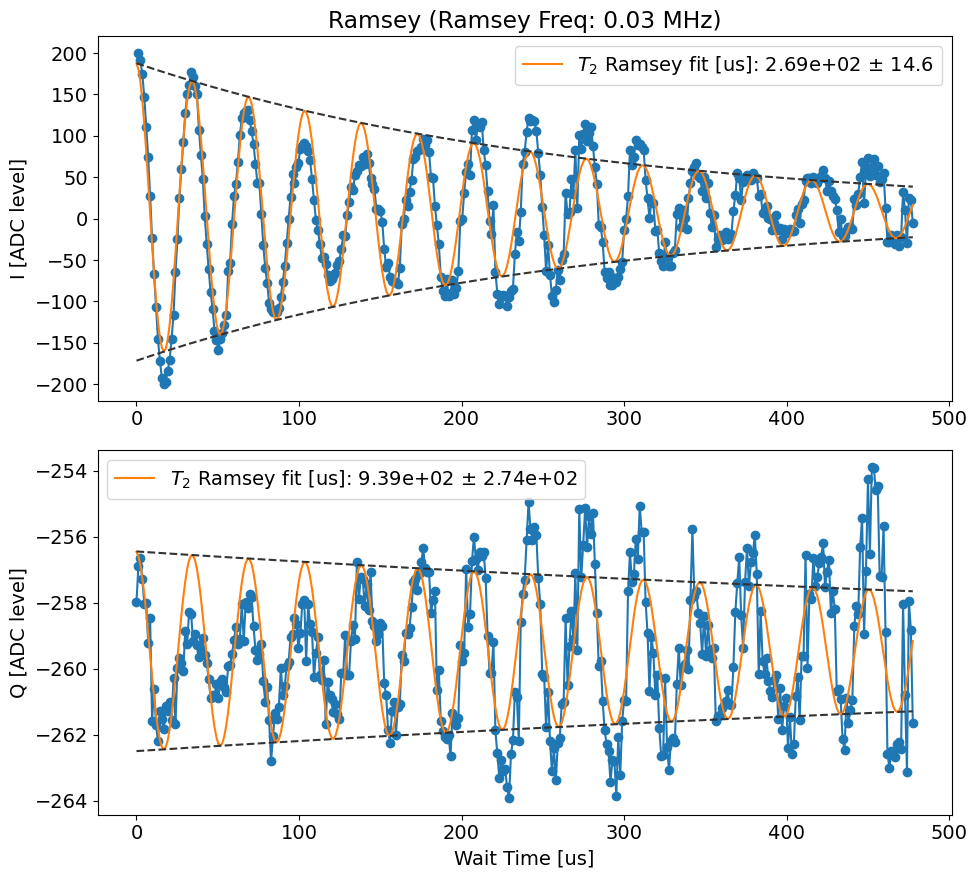

In [490]:
temp_data, attrs = prev_data(expt_path, '00036_RamseyExperiment.h5')
temp_data, attrs = prev_data(expt_path, '00021_cavity_temperature_sweep.h5')

t2, t2_err, xdata_, idata = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True,fitparams=None, #[1000, 0.5, None, None, None, None],
                  return_idata = True,  title='Ramsey')

In [430]:
1/.015

66.66666666666667

In [431]:
1/0.05

20.0

In [432]:
len(ydata)

338

## Automatic calculate temperature 

In [484]:
def find_fft_and_plot(ydata, xdata):
    start_idx = 0
    end_idx = -60
    xdata = xdata_[start_idx:end_idx]
    ydata = idata[start_idx:end_idx]


    # Perform Fourier transform
    ydata_fft = np.fft.fft(ydata)
    frequencies = np.fft.fftfreq(len(ydata), d=(xdata[1] - xdata[0]))
    # Sort the FFT data 
    sorted_idx = np.argsort(frequencies)
    frequencies = frequencies[sorted_idx]
    ydata_fft = ydata_fft[sorted_idx]

    # Plot the original data
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(xdata, ydata, label='Original Data')
    plt.xlabel('Time (mus)')
    plt.ylabel('Amplitude')
    plt.title('Original Data')
    plt.legend()
    plt.grid(True)

    # Plot the Fourier transform
    plt.subplot(2, 1, 2)

    plt.plot(frequencies, np.abs(ydata_fft) / max(ydata_fft), '-', label='Fourier Transform')

    ramsey_fit_freq = attrs['config']['expt']['ramsey_freq']# 0.02 #0.21797037655105334
    plt.axvline(x=ramsey_fit_freq, color='red', linestyle='--', label='Ramsey Fit Frequency')
    plt.axvline(x=-ramsey_fit_freq, color='red', linestyle='--')

    m1_chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][1])
    m2_chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][2])  
    chi_shift_ramsey_freq_m1 = ramsey_fit_freq + m1_chi
    chi_shift_ramsey_freq_m2 = ramsey_fit_freq + m2_chi

    plt.axvline(x=chi_shift_ramsey_freq_m1, color='green', linestyle='--', label='M1 Chi Shift Frequency', ymin = 0.1)
    plt.axvline(x=-1 * chi_shift_ramsey_freq_m1, color='green', linestyle='--', ymin=0.1)
    plt.axvline(x=chi_shift_ramsey_freq_m2, color='purple', linestyle='--', label='M2 Chi Shift Frequency', ymin = 0.1)
    plt.axvline(x=-1 * chi_shift_ramsey_freq_m2, color='purple', linestyle='--', ymin=0.1)


    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Magnitude')
    plt.title('Fourier Transform')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Find the peaks in the FFT data and plot 
    # Assuming xdata and ydata are already defined
    xdata = frequencies
    ydata = np.abs(ydata_fft) / max(ydata_fft)

    # Find peaks
    peaks, _ = find_peaks(ydata, threshold=0.1)

    # remove peaks around 0 freq
    n_peaks = []
    for peak in peaks: 
        if abs(xdata[peak]) > 0.01:
            n_peaks.append(peak)
    n_peaks = np.array(n_peaks)

    # Plot the original data
    plt.figure(figsize=(12, 6))
    plt.plot(xdata, np.abs(ydata), label='Fourier Transform')
    plt.plot(xdata[n_peaks], ydata[n_peaks], 'rx', label='Peaks')  # Mark peaks with red 'x'

    # add horizzontal line at 0.04
    plt.axhline(y=0.01, color='g', linestyle='--', label='Threshold')

    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Magnitude')
    plt.title('Fourier Transform with Peaks')
    plt.legend()
    plt.grid(True)
    plt.show()
    return frequencies, ydata, n_peaks

def find_max_height(frequencies, ydata, freq, chi_shift_range): 
    '''
    Find the max height in the range of chi_shift_range above and below the frequency
    '''
    idx = np.where((frequencies > freq - chi_shift_range) & (frequencies < freq + chi_shift_range))
    idx2 = np.where((frequencies > -1*(freq - chi_shift_range)) & (frequencies < -1*(freq + chi_shift_range)))
    combined_idx = np.concatenate((idx[0], idx2[0]))
    max_height = np.max(np.abs(ydata[combined_idx]))
    max_idx = combined_idx[np.argmax(np.abs(ydata[combined_idx]))]
    return max_height, max_idx

def find_avg_height(frequencies, ydata,  freq, chi_shift_range): 
    '''
    Find the avg height in the range of chi_shift_range above and below the frequency
    '''
    idx =  np.where((frequencies > freq - chi_shift_range) & (frequencies < freq + chi_shift_range))
    #idx2 = np.where((frequencies > -1*(freq -chi_shift_range)) & (frequencies < -1*(freq + chi_shift_range)))
    return np.mean((np.abs(ydata[idx]))), np.std(np.abs(ydata[idx])) #np.mean(np.concatenate((np.abs(ydata[idx]), np.abs(ydata[idx2])))

def find_ramsey_heights(attrs, frequencies, ydata, peaks): 
    '''Find weight of ramsey freq as m1/m2 chi shift freq'''

    ramsey_peak_height = max(np.abs(ydata[peaks]))
    ramsey_freq = frequencies[peaks][0]
    print('Ramsey Peak Height:', ramsey_peak_height)
    print('Ramsey Frequency:', ramsey_freq)

    m1_chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][1])
    m2_chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][2])

    chi_shift_ramsey_freq_m1 = ramsey_freq + m1_chi
    chi_shift_ramsey_freq_m2 = ramsey_freq + m2_chi

    # find max height in range of 2 khz above and below the chi shift frequency
    chi_shift_range = 2
    chi_shift_range = chi_shift_range * 1e-3

    m1_chi_shift_height, _ = find_max_height(frequencies, ydata, chi_shift_ramsey_freq_m1, chi_shift_range)
    m2_chi_shift_height, _  = find_max_height(frequencies, ydata, chi_shift_ramsey_freq_m2, chi_shift_range)
    m1_avg_chi_shift_height, m1_err_chi_shift_height = find_avg_height(frequencies, ydata, chi_shift_ramsey_freq_m1 +0.07, 0.05)
    

    print('M1 Chi Shift Height:', m1_chi_shift_height)
    print('M2 Chi Shift Height:', m2_chi_shift_height)

    corrected_m1_chi_shift_height = m1_chi_shift_height - m1_avg_chi_shift_height
    print('Corrected M1 Chi Shift Height:', corrected_m1_chi_shift_height)
    corrected_m2_chi_shift_height = m2_chi_shift_height - m1_avg_chi_shift_height
    print('Corrected M2 Chi Shift Height:', corrected_m2_chi_shift_height)
    return ramsey_peak_height, corrected_m1_chi_shift_height, corrected_m2_chi_shift_height, m1_err_chi_shift_height

def find_temperature(n_thermal, frequency):
    ''' Use the formula n_thermal = 1/(exp(hf/kT) - 1) to find the temperature'''   
    freq_to_mK = 48 # 1Ghz = 48mK
    freq_temp = frequency * freq_to_mK
    temp_th = freq_temp / np.log((n_thermal + 1)/n_thermal)
    return temp_th

def find_cavity_temperature(ramsey_peak_height, m1_chi_shift_height, m2_chi_shift_height, ebar_height, attrs):
    ''' Find the cavity temperature using the heights of the peaks and the ramsey frequency'''
    n_thermal1 =  m1_chi_shift_height / ramsey_peak_height
    frequency1 = attrs['config']['device']['manipulate']['f_ge'][0]
    temp_th1 = find_temperature(n_thermal1, frequency1 * 1e-3)
    print('m1 Cavity Temperature:', temp_th1)

    n_thermal2 =  m2_chi_shift_height / ramsey_peak_height
    frequency2 = attrs['config']['device']['manipulate']['f_ge'][1]
    temp_th2 = find_temperature(n_thermal2, frequency2 * 1e-3)
    print('m2 Cavity Temperature:', temp_th2)
    
    n_thermal3 =  ebar_height / ramsey_peak_height
    frequency3 = 5
    temp_th3 = find_temperature(n_thermal3, frequency3 )
    print('Cavity Temperature:', temp_th3)

    return temp_th1, temp_th2, n_thermal1, n_thermal2, temp_th3, n_thermal3







Attempted to init fitparam 1 to 0.05862646566164155, which is out of bounds 0.00020990764063811925 to 0.031486146095717885. Instead init to 0.015848026868178003
Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.02887027911317895 +/- 3.0743258703052694e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.152725043647
 	3568.2104656018737
T2 Ramsey from fit I [us]: 253.46783967627258
Fit frequency from Q [MHz]: 0.028869015887352054 +/- 3.139817480373684e-05
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.152726306873
 	3568.210464338648
T2 Ramsey from fit Q [us]: 284.078970515136


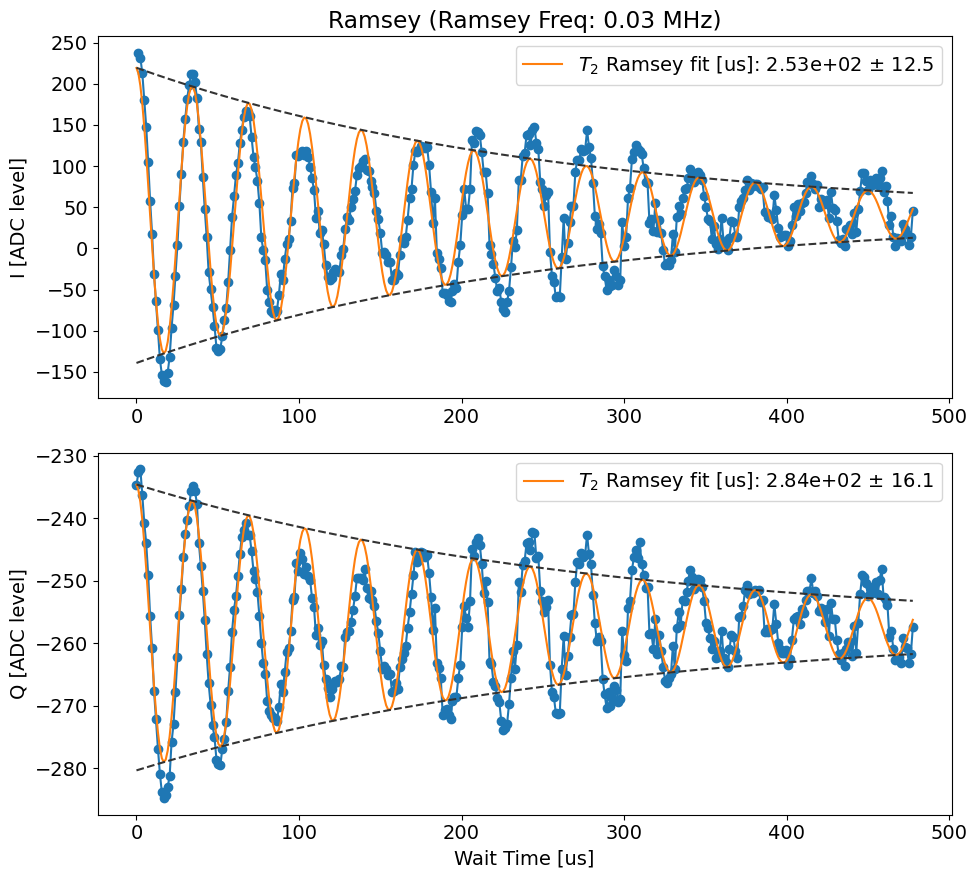

c:\Users\26049\.conda\envs\slab\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


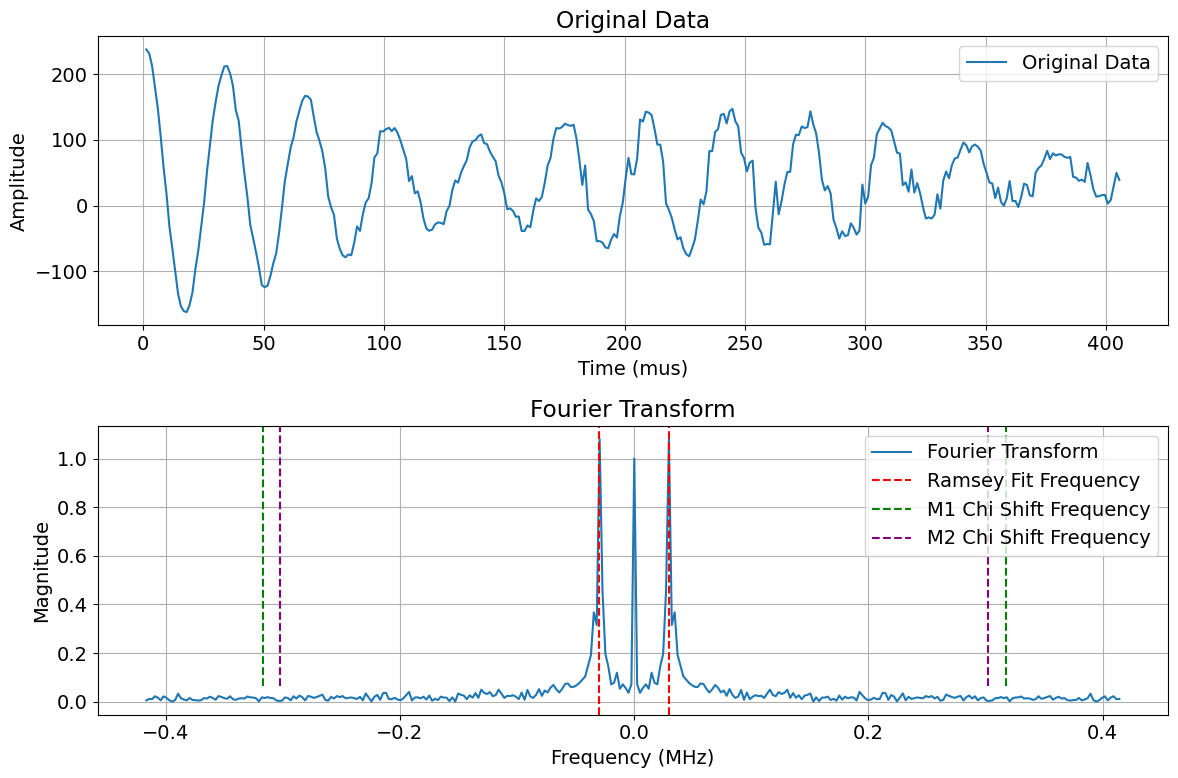

c:\Users\26049\.conda\envs\slab\lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


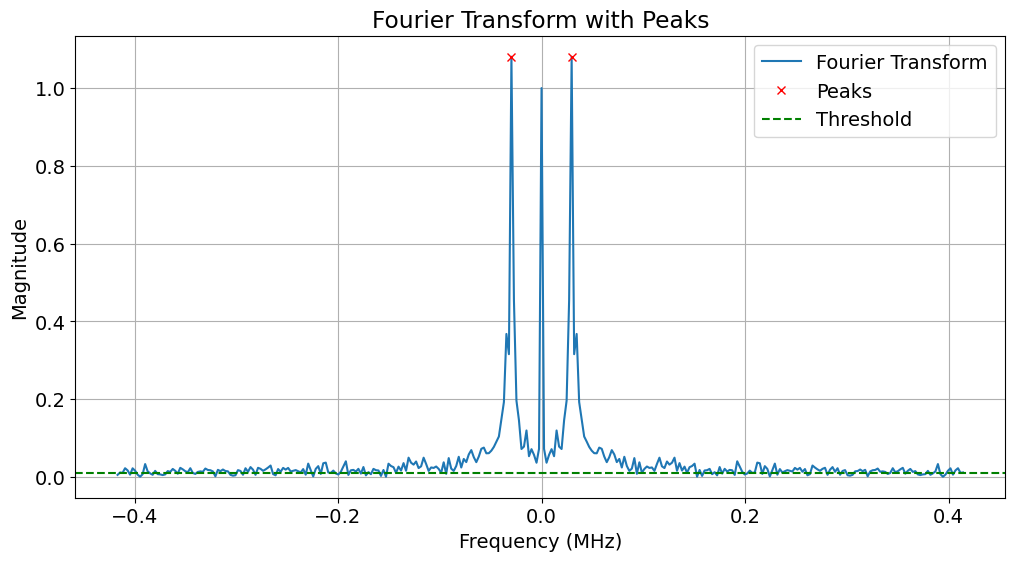

Ramsey Peak Height: 1.080679379002419
Ramsey Frequency: -0.029585798816568053
M1 Chi Shift Height: 0.020296505342393554
M2 Chi Shift Height: 0.017581194884692564
Corrected M1 Chi Shift Height: 0.006564565301869666
Corrected M2 Chi Shift Height: 0.003849254844168676
m1 Cavity Temperature: 46.819295747904064
m2 Cavity Temperature: 43.888673279970114
Cavity Temperature: 46.53988292951621
Attempted to init fitparam 1 to 0.05862646566164155, which is out of bounds 0.00020990764063811925 to 0.031486146095717885. Instead init to 0.015848026868178003
Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.028882574232139482 +/- 3.016679109342365e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.1527127485283
 	3568.2104778969924
T2 Ramsey from fit I [us]: 267.0477308767415
Fit frequency from Q [MHz]: 0.028889892356055935 +/- 2.9880934229424776e-05
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.1527054304042
 	3568.2104852151165
T2 Ramsey from fit Q

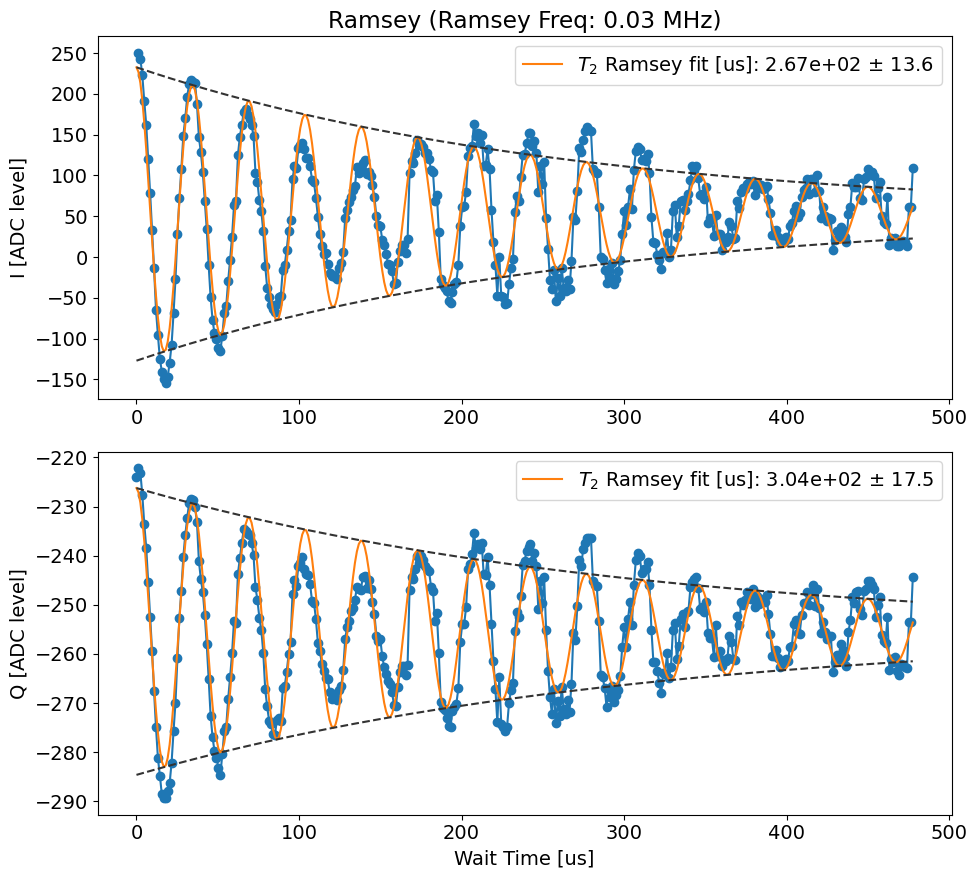

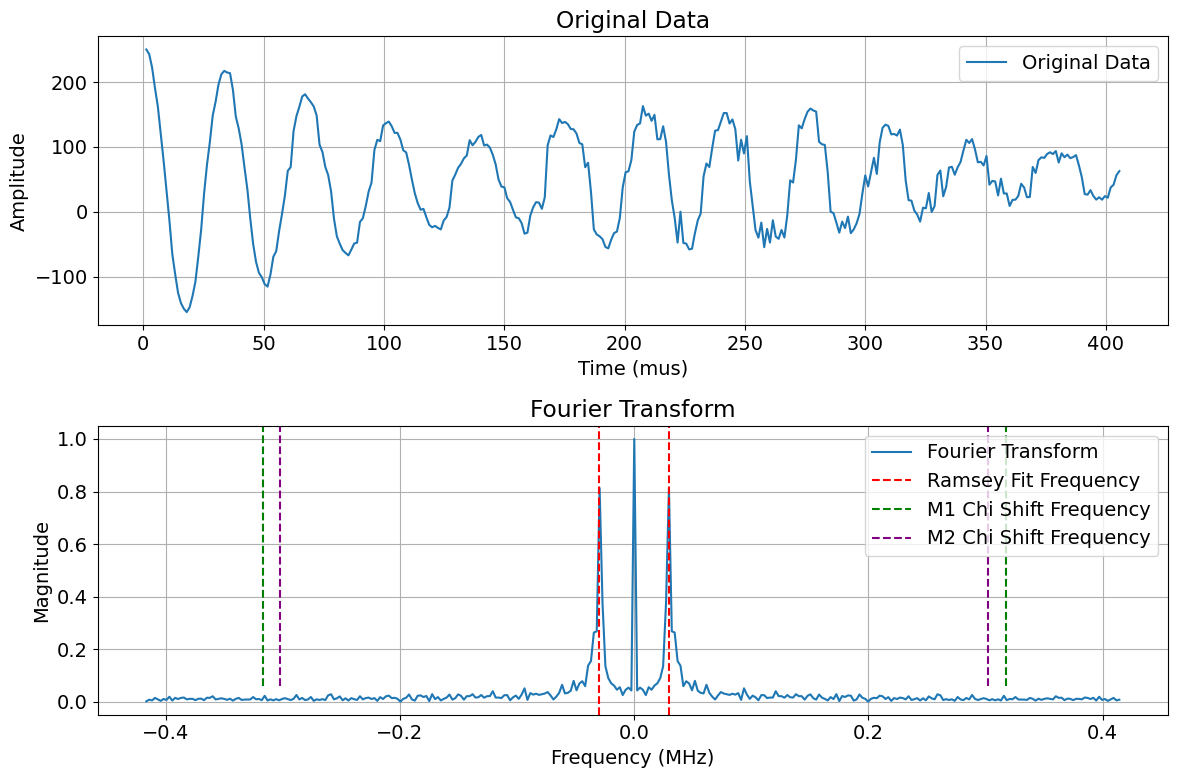

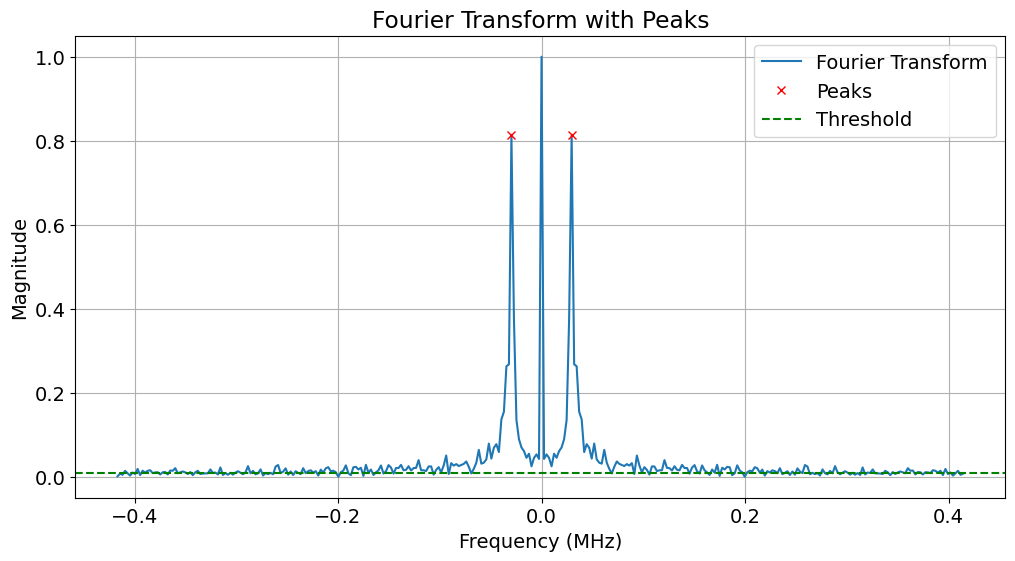

Ramsey Peak Height: 0.8130433005396439
Ramsey Frequency: -0.029585798816568053
M1 Chi Shift Height: 0.028442007421271398
M2 Chi Shift Height: 0.013673268572288044
Corrected M1 Chi Shift Height: 0.017760770835543532
Corrected M2 Chi Shift Height: 0.00299203198656018
m1 Cavity Temperature: 62.21281064486273
m2 Cavity Temperature: 44.143125219276556
Cavity Temperature: 46.52716316972282
Attempted to init fitparam 1 to 0.05862646566164155, which is out of bounds 0.00020990764063811925 to 0.031486146095717885. Instead init to 0.015848026868178003
Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.028909790024827426 +/- 2.8207631686911332e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.1526855327356
 	3568.210505112785
T2 Ramsey from fit I [us]: 297.30175053623293
Fit frequency from Q [MHz]: 0.028913556858080385 +/- 2.7798802688970556e-05
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.1526817659023
 	3568.2105088796184
T2 Ramsey from fit Q

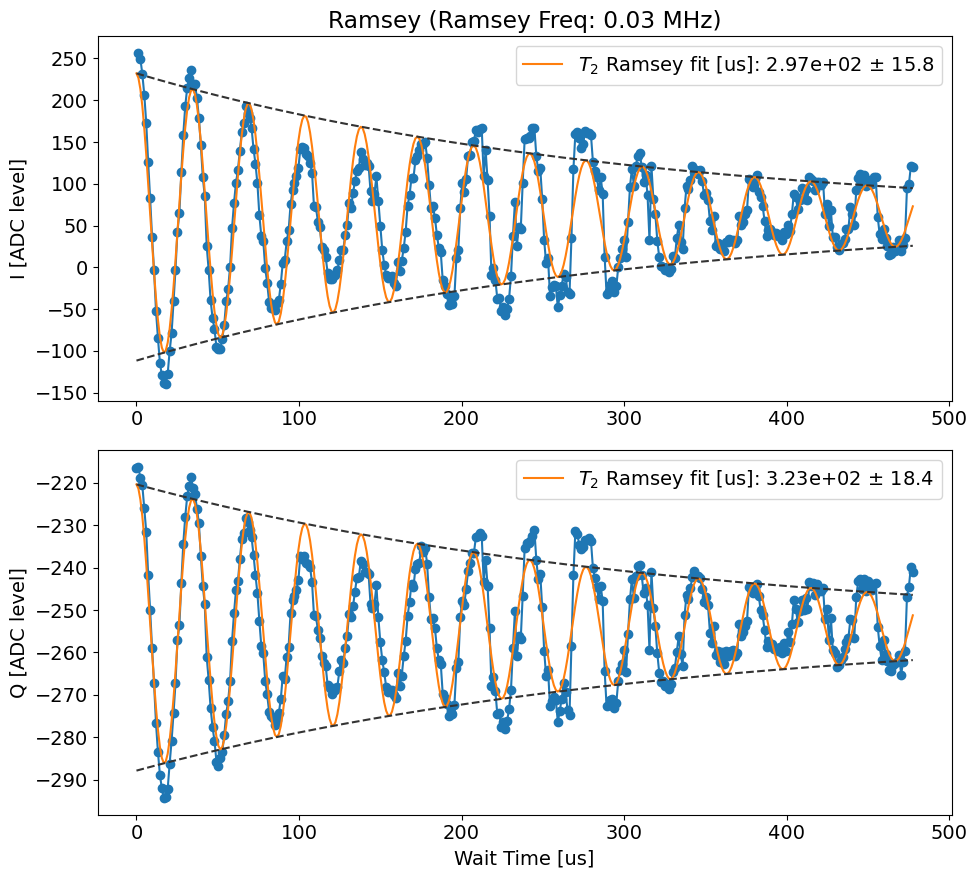

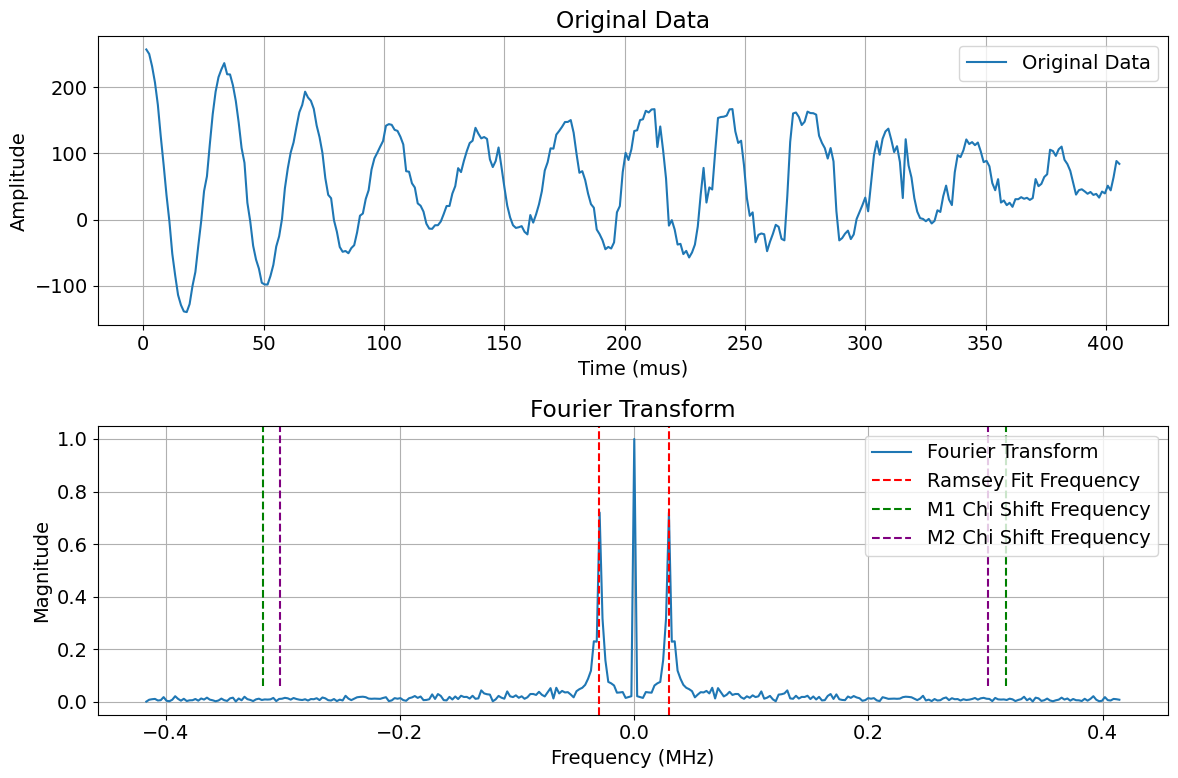

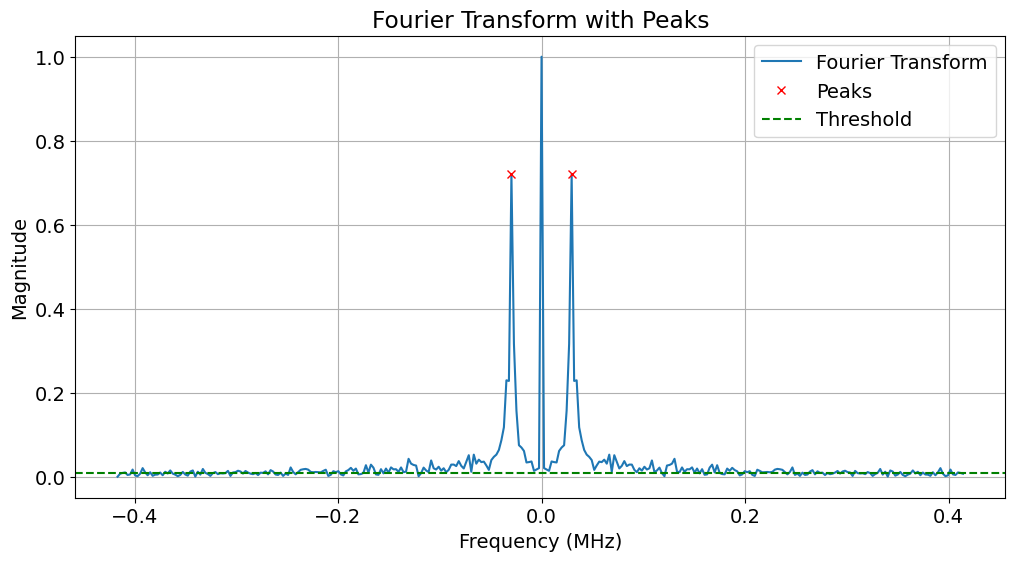

Ramsey Peak Height: 0.7199561763198351
Ramsey Frequency: -0.029585798816568053
M1 Chi Shift Height: 0.009925623343066866
M2 Chi Shift Height: 0.011550936117636232
Corrected M1 Chi Shift Height: 0.0013738062820381498
Corrected M2 Chi Shift Height: 0.0029991190566075153
m1 Cavity Temperature: 38.194750170328476
m2 Cavity Temperature: 45.1368522728151
Cavity Temperature: 46.589915173175825
Attempted to init fitparam 1 to 0.05862646566164155, which is out of bounds 0.00020990764063811925 to 0.031486146095717885. Instead init to 0.015848026868178003
Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.029037911841429894 +/- 3.0247794410255772e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.152557410919
 	3568.210633234602
T2 Ramsey from fit I [us]: 254.6358216809719
Fit frequency from Q [MHz]: 0.029029416767732186 +/- 3.039837401861795e-05
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.1525659059926
 	3568.210624739528
T2 Ramsey from fit Q 

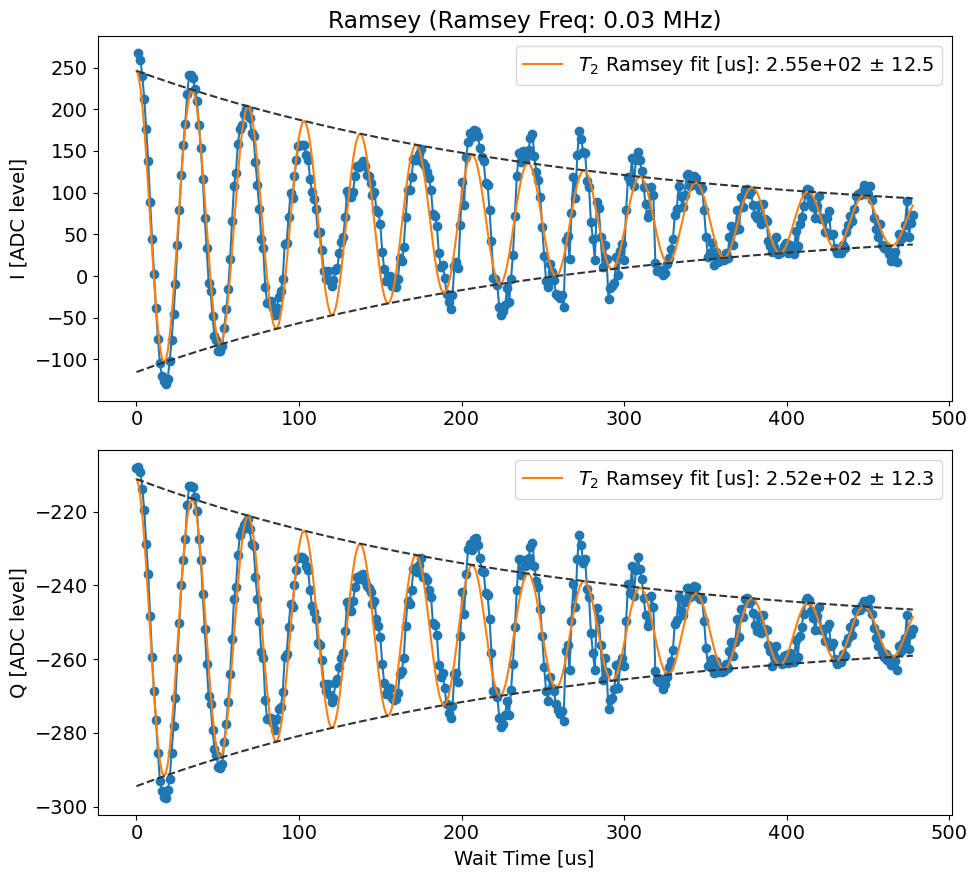

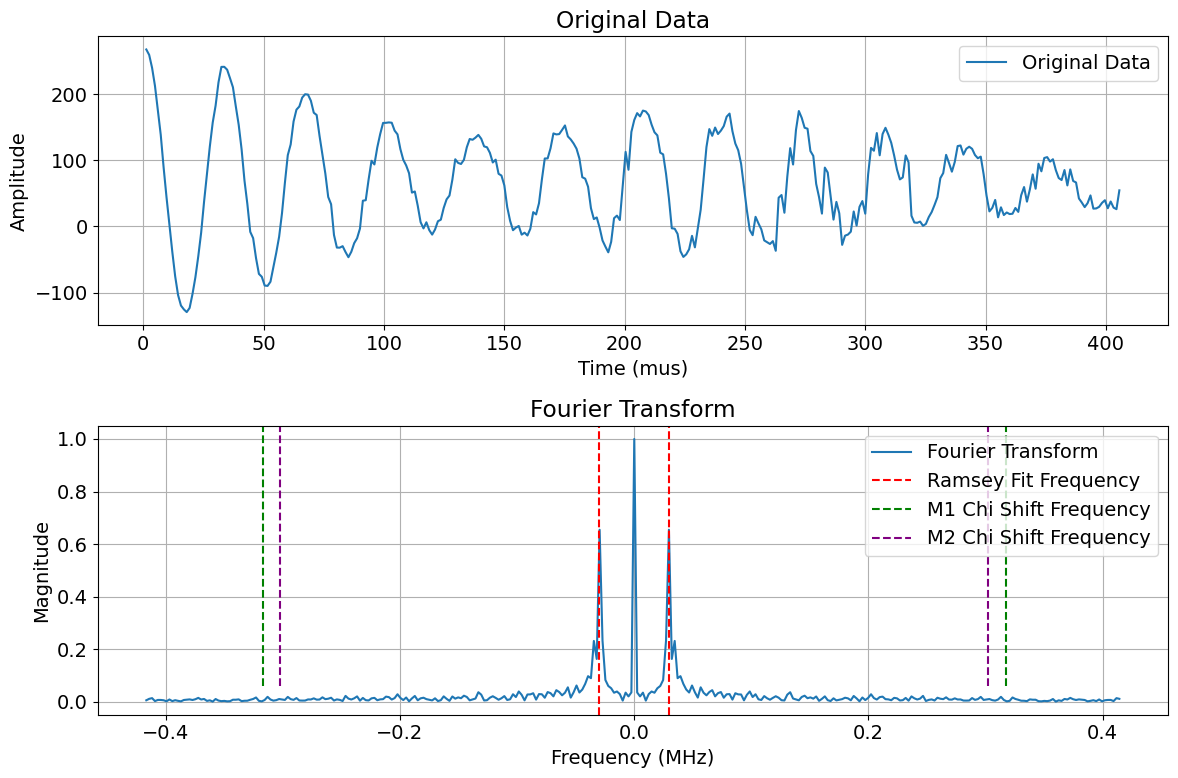

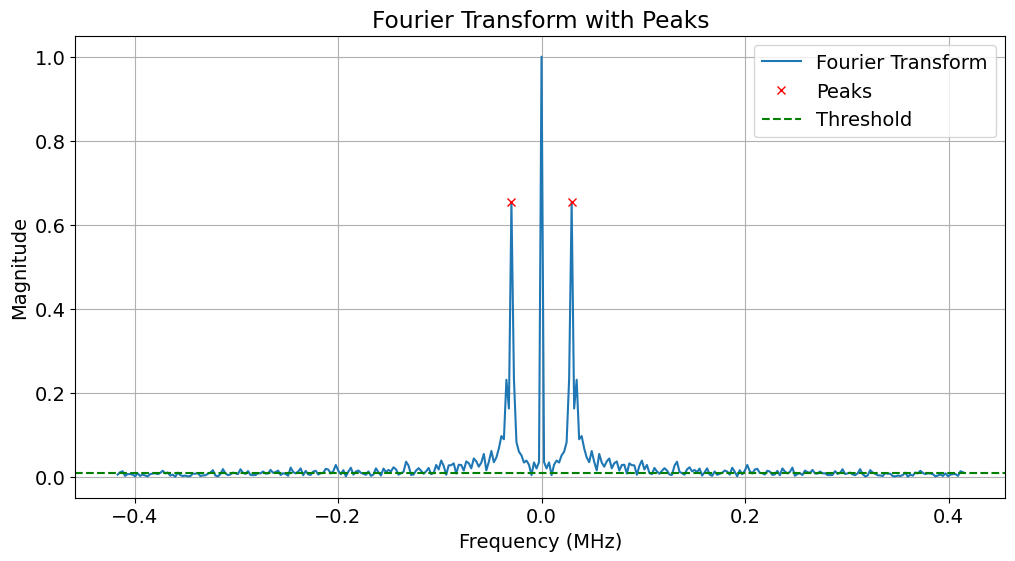

Ramsey Peak Height: 0.6547665448762356
Ramsey Frequency: -0.029585798816568053
M1 Chi Shift Height: 0.0157340873885936
M2 Chi Shift Height: 0.01245683047747743
Corrected M1 Chi Shift Height: 0.007949413921172434
Corrected M2 Chi Shift Height: 0.0046721570100562645
m1 Cavity Temperature: 54.08542375749392
m2 Cavity Temperature: 50.0178848228847
Cavity Temperature: 47.94666743441355
Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.02878635806536013 +/- 3.0923858750807926e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.152808964695
 	3568.210381680826
T2 Ramsey from fit I [us]: 270.6540482901889
Fit frequency from Q [MHz]: 0.02878030529273662 +/- 3.373939013095967e-05
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.1528150174677
 	3568.210375628053
T2 Ramsey from fit Q [us]: 203.18897193447404


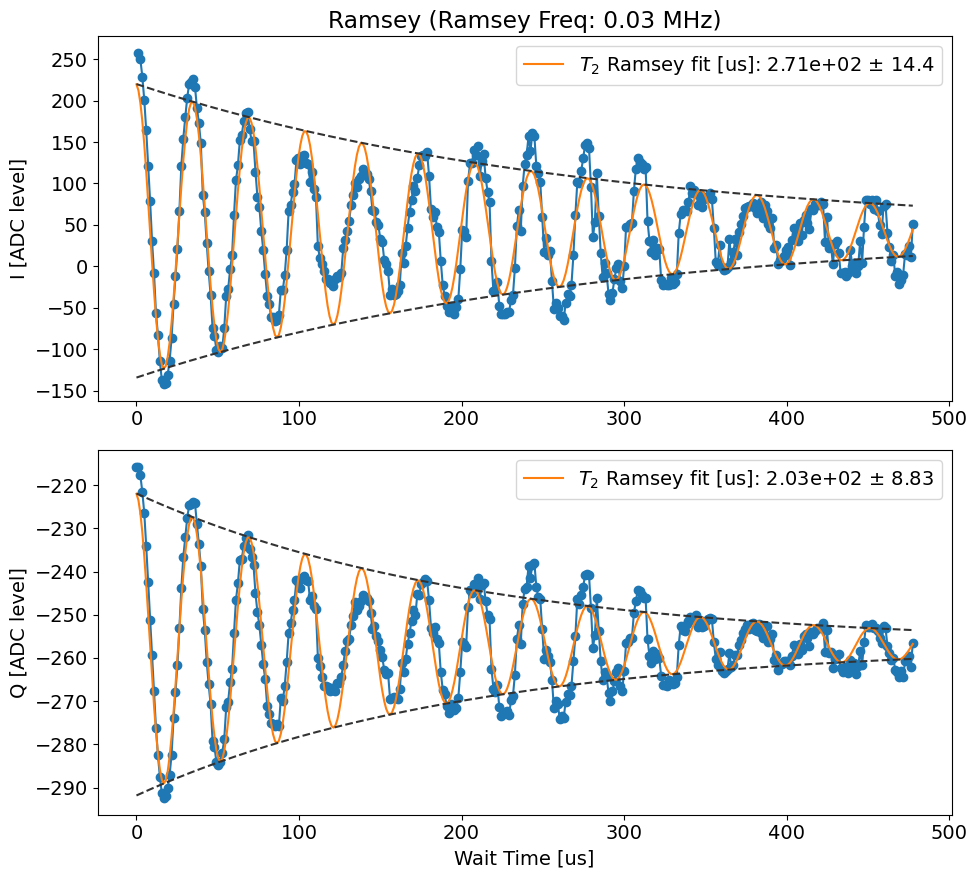

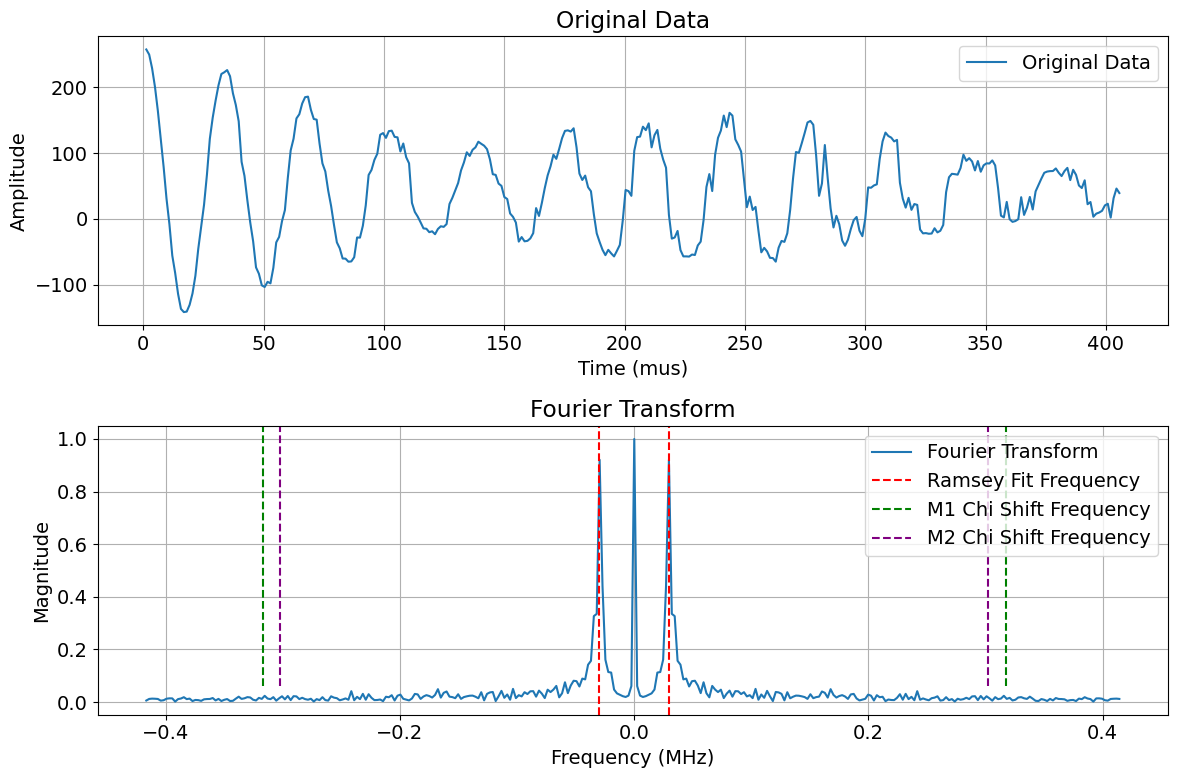

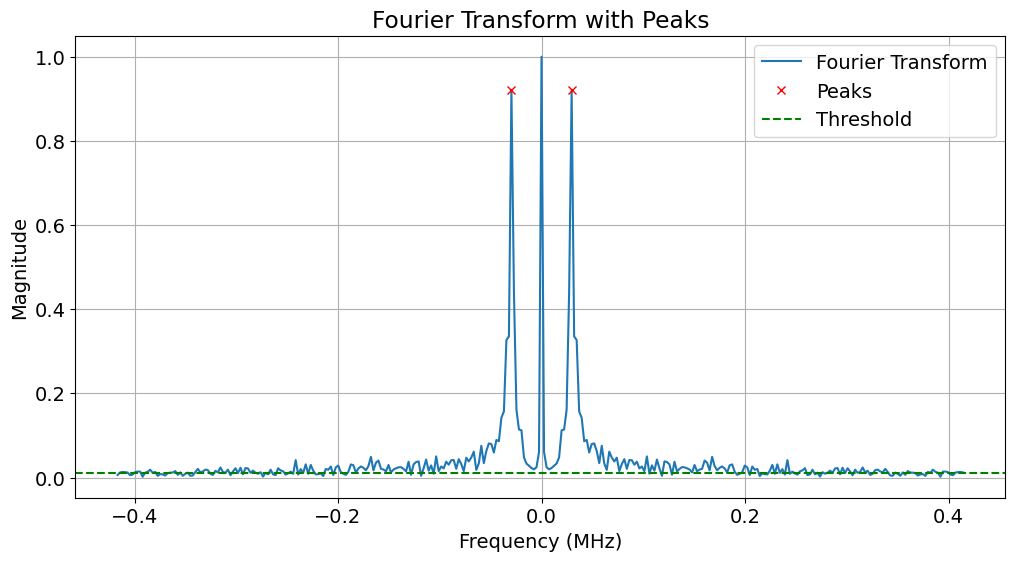

Ramsey Peak Height: 0.9208329501567735
Ramsey Frequency: -0.029585798816568053
M1 Chi Shift Height: 0.021978604548483445
M2 Chi Shift Height: 0.041438573162629465
Corrected M1 Chi Shift Height: 0.009611416074314597
Corrected M2 Chi Shift Height: 0.029071384688460617
m1 Cavity Temperature: 52.31760153794405
m2 Cavity Temperature: 71.0079854079814
Cavity Temperature: 47.087280757063546
Attempted to init fitparam 1 to 0.05862646566164155, which is out of bounds 0.00020990764063811925 to 0.031486146095717885. Instead init to 0.015848026868178003
Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.028846336133902143 +/- 3.23171223911673e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.1527489866266
 	3568.210441658894
T2 Ramsey from fit I [us]: 264.86112106356427
Fit frequency from Q [MHz]: 0.028802888963843965 +/- 3.619371999000852e-05
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.1527924337965
 	3568.210398211724
T2 Ramsey from fit Q [us

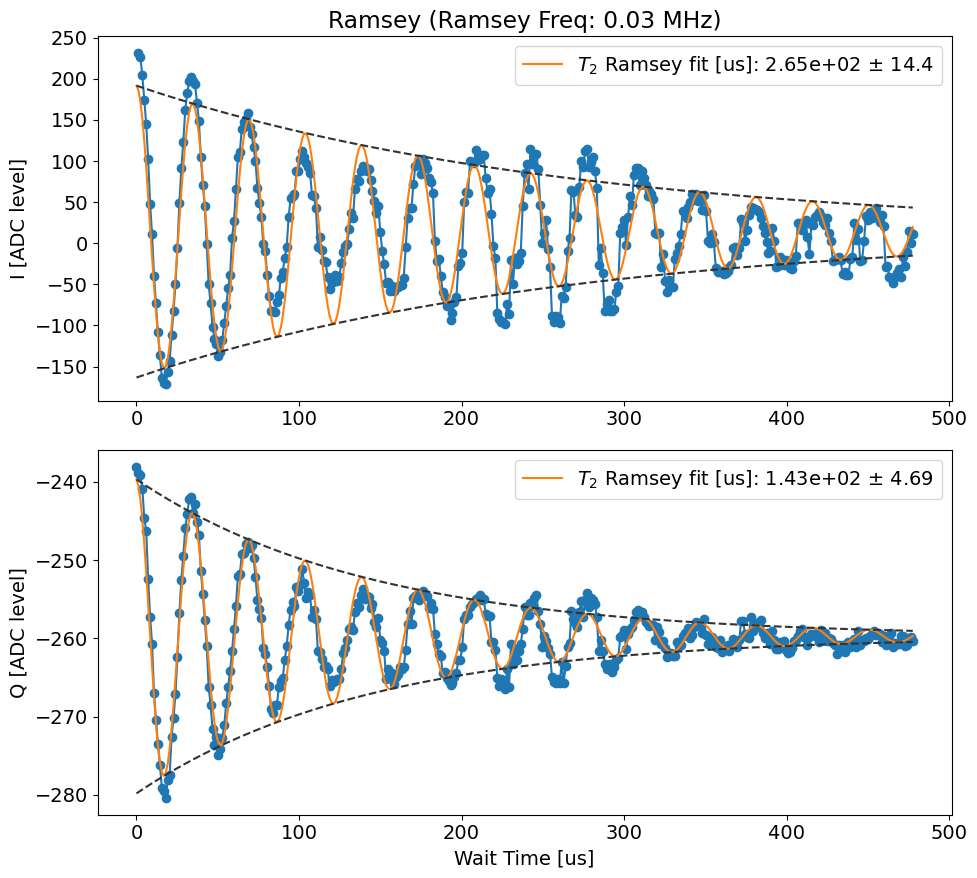

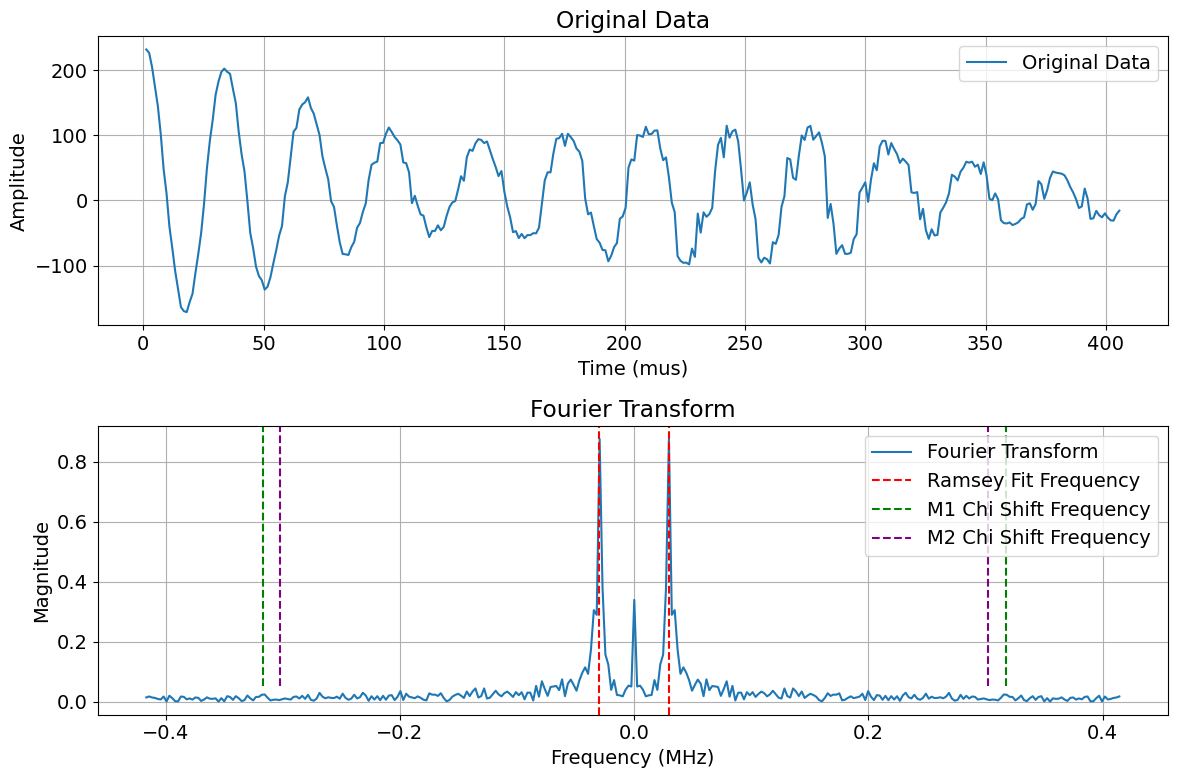

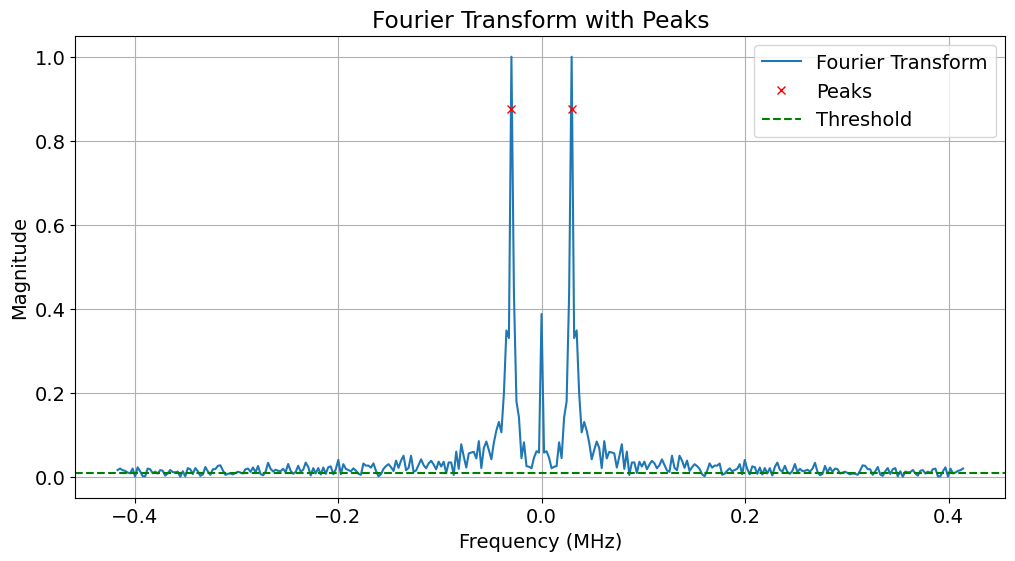

Ramsey Peak Height: 1.0
Ramsey Frequency: -0.029585798816568053
M1 Chi Shift Height: 0.015507943766141853
M2 Chi Shift Height: 0.01265876854280975
Corrected M1 Chi Shift Height: 0.0016603972139145398
Corrected M2 Chi Shift Height: -0.0011887780094175637
m1 Cavity Temperature: 37.366432533009835
m2 Cavity Temperature: nan
Cavity Temperature: 48.288381759337625


C:\Users\26049\AppData\Local\Temp\ipykernel_14612\1276768143.py:142: RuntimeWarning: invalid value encountered in log
  temp_th = freq_temp / np.log((n_thermal + 1)/n_thermal)


Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.02878034068848061 +/- 2.82373254217608e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.152814982072
 	3568.2103756634488
T2 Ramsey from fit I [us]: 256.58057911473594
Fit frequency from Q [MHz]: 0.03100938152184233 +/- 0.00013879791604134886
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.1505859412387
 	3568.212604704282
T2 Ramsey from fit Q [us]: 190.0279656834702


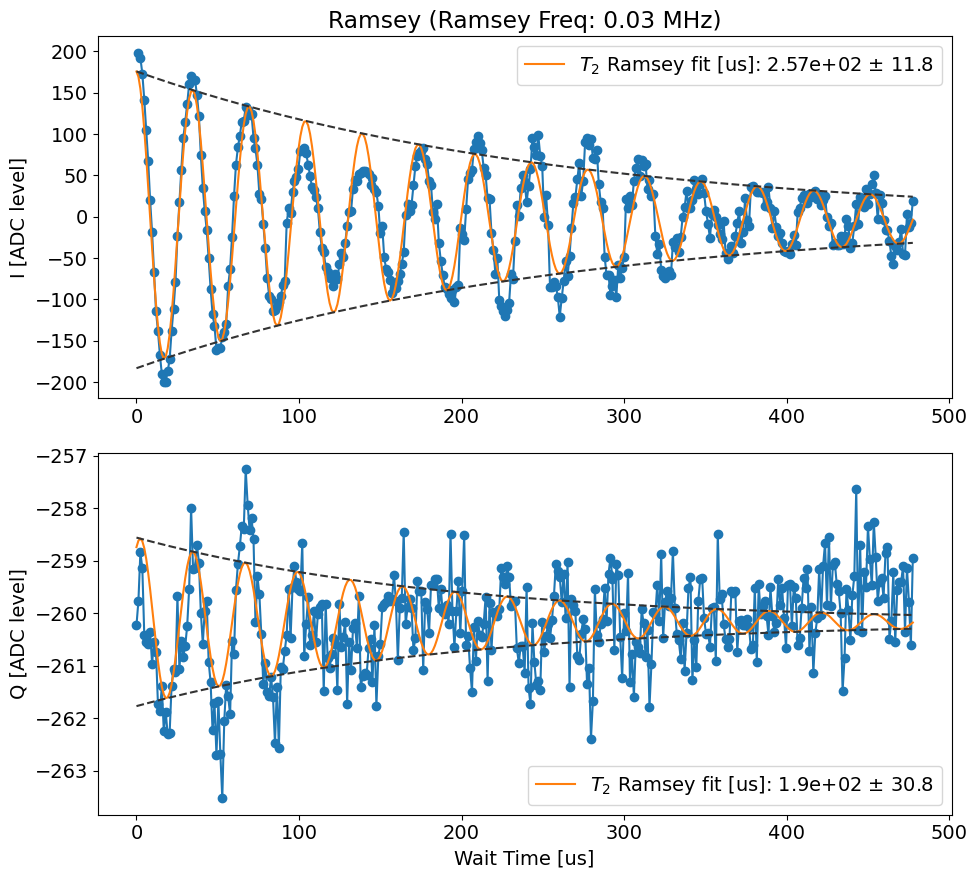

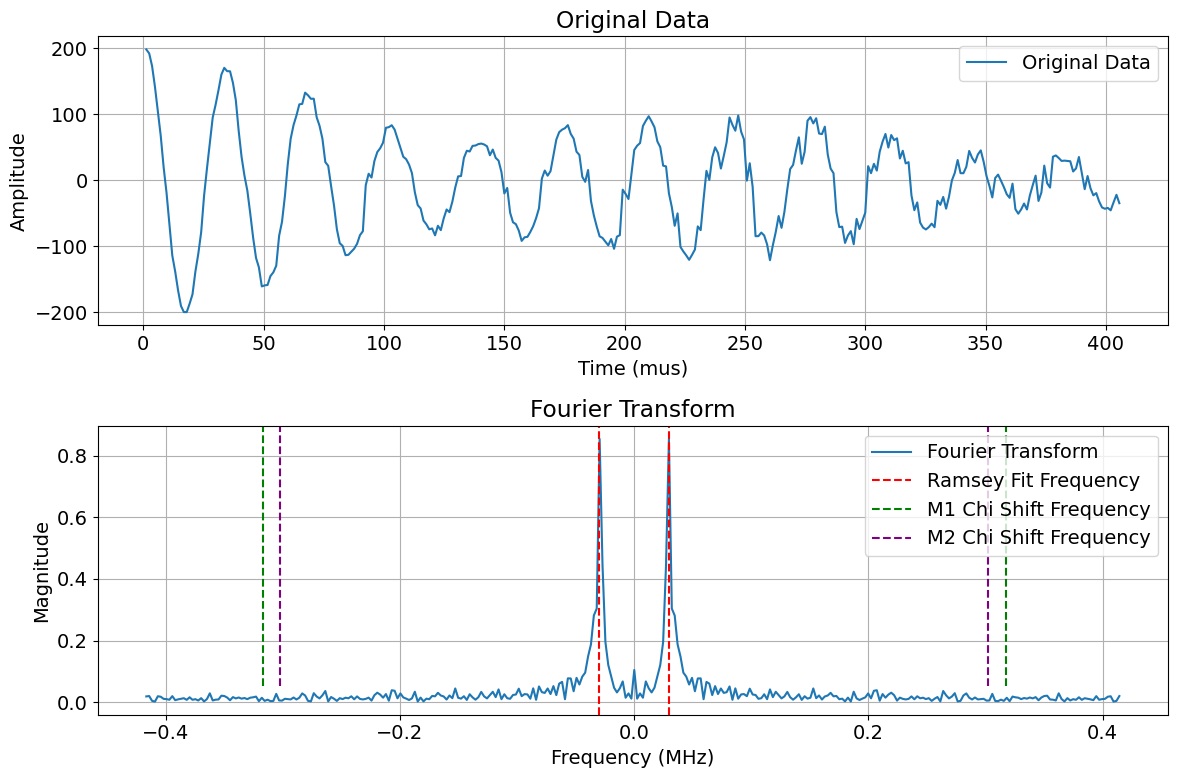

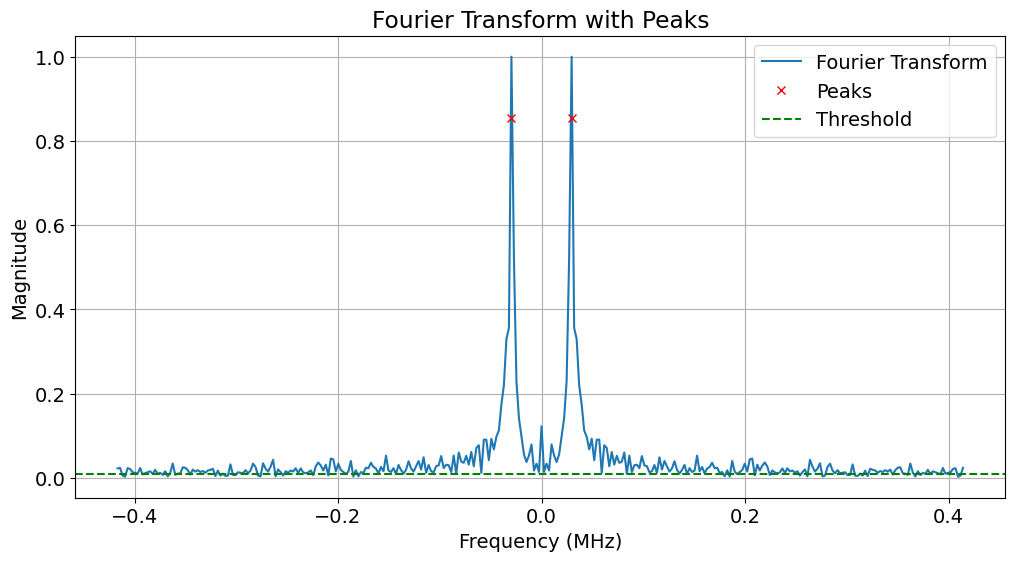

Ramsey Peak Height: 1.0
Ramsey Frequency: -0.029585798816568053
M1 Chi Shift Height: 0.020217447873957343
M2 Chi Shift Height: 0.022980985747981564
Corrected M1 Chi Shift Height: 0.005669985694350666
Corrected M2 Chi Shift Height: 0.008433523568374887
m1 Cavity Temperature: 46.19987845681433
m2 Cavity Temperature: 51.75169371524862
Cavity Temperature: 49.48274550452178
Attempted to init fitparam 1 to 0.05862646566164155, which is out of bounds 0.00020990764063811925 to 0.031486146095717885. Instead init to 0.015848026868178003
Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.028866986116808747 +/- 3.163712070395625e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.1527283366436
 	3568.210462308877
T2 Ramsey from fit I [us]: 269.4712912912402
Fit frequency from Q [MHz]: 0.028817485225317862 +/- 4.849308299332867e-05
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.1527778375353
 	3568.210412807986
T2 Ramsey from fit Q [us]: 938.68776014

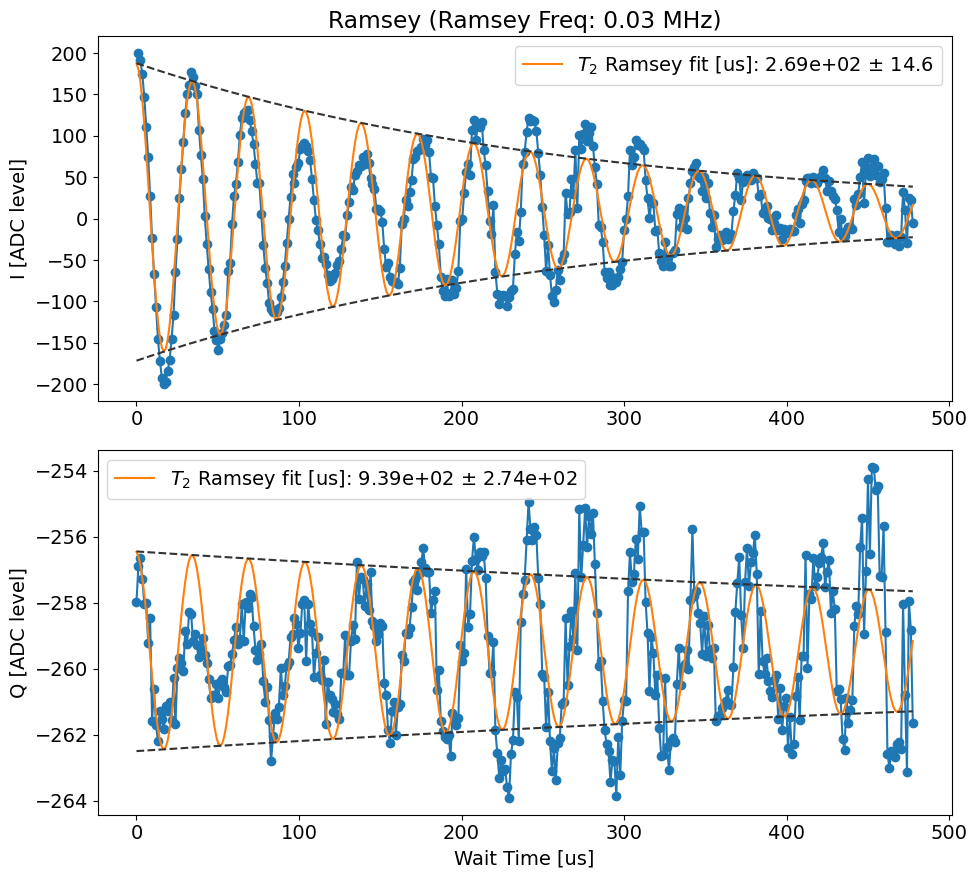

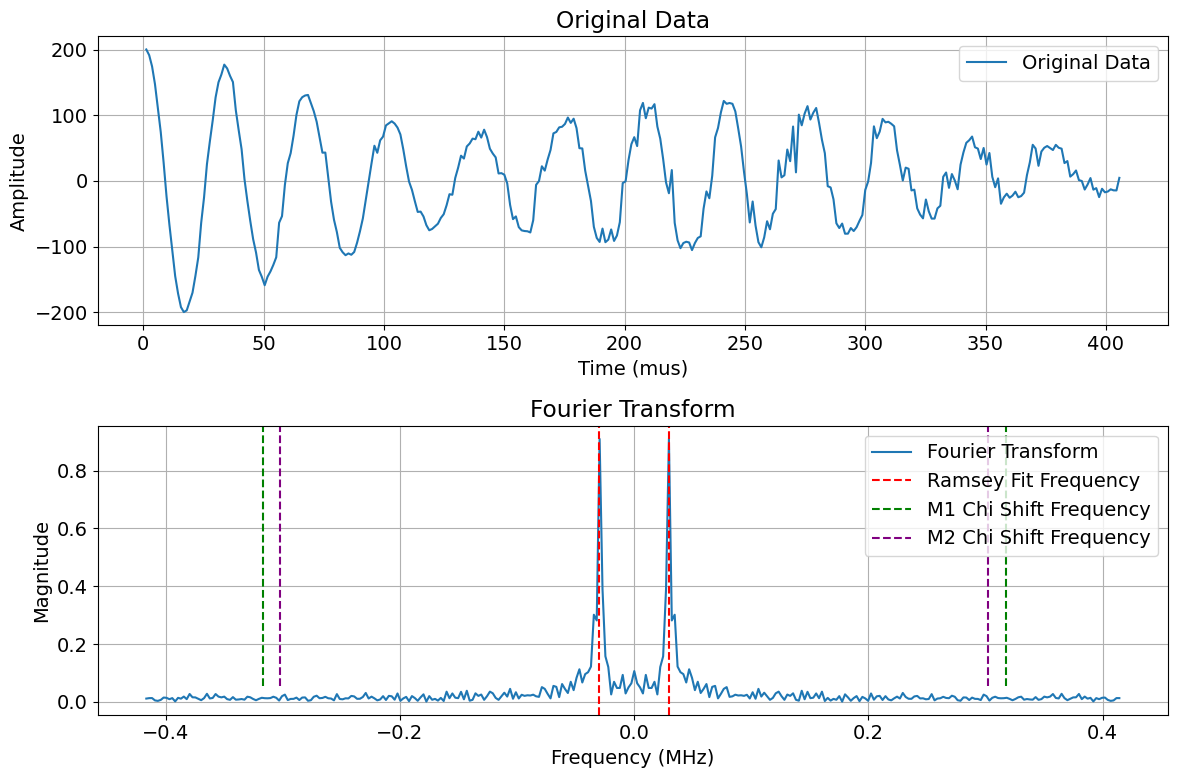

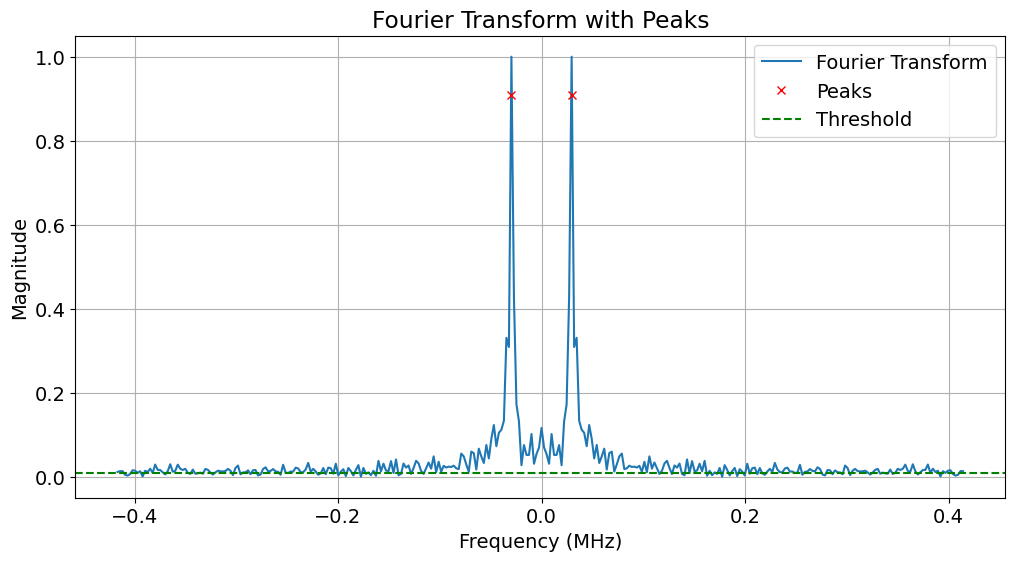

Ramsey Peak Height: 0.9999999999999999
Ramsey Frequency: -0.029585798816568053
M1 Chi Shift Height: 0.012536366933193138
M2 Chi Shift Height: 0.02248056007518265
Corrected M1 Chi Shift Height: -0.0016161729521659042
Corrected M2 Chi Shift Height: 0.008328020189823607
m1 Cavity Temperature: nan
m2 Cavity Temperature: 51.616992764387604
Cavity Temperature: 47.129813064314476


In [485]:
m1_thermal  = []
m1_temp = []
m2_thermal = []
m2_temp = []
ebar_thermal = []
ebar_temp = []


file_list = np.arange(14, 22, 1)
for i in file_list:
    temp_data, attrs = prev_data(expt_path, f'000{i}_cavity_temperature_sweep.h5')
    t2, t2_err, xdata_, idata = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True,fitparams=None, #[1000, 0.5, None, None, None, None],
                  return_idata = True,  title='Ramsey')
    frequencies, ydata_fft, n_peaks = find_fft_and_plot(idata, xdata_)
    ramsey_peak_height, m1_chi_shift_height, m2_chi_shift_height, ebar_height = find_ramsey_heights(attrs, frequencies, ydata_fft, n_peaks)
    temp_th1, temp_th2, n_thermal1, n_thermal2, ebar_temp_, ebar_thermal_ = find_cavity_temperature(ramsey_peak_height, m1_chi_shift_height, m2_chi_shift_height, ebar_height, attrs)
    m1_thermal.append(n_thermal1)
    m1_temp.append(temp_th1)
    m2_thermal.append(n_thermal2)
    m2_temp.append(temp_th2)
    ebar_thermal.append(ebar_thermal_)
    ebar_temp.append(ebar_temp_)



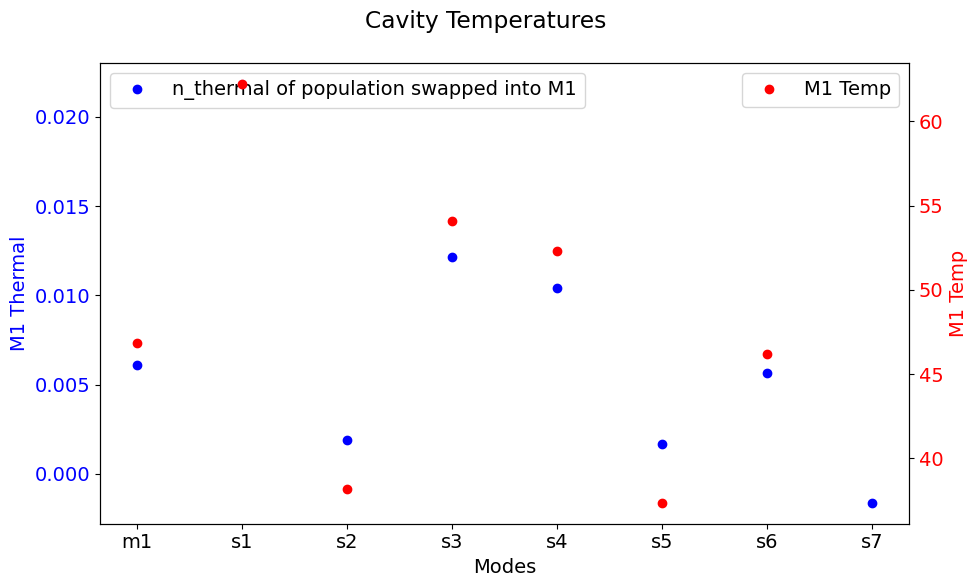

In [486]:
modes = ['m1', 's1', 's2', 's3', 's4', 's5', 's6', 's7'][:len(m1_thermal)]
modes_ref = ['m2' for i in range(8)][:len(m1_thermal)]

# plot m1_thermal vs modes and m1_temp vs modes on the same plot with 2 yaxis 
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot m1_thermal vs modes on the primary y-axis
ax1.plot(modes, m1_thermal, 'bo', label='n_thermal of population swapped into M1')
# ax1.plot(modes, m2_thermal, color = 'tab:blue', label='n_thermal of population in M2')
ax1.set_xlabel('Modes')
ax1.set_ylabel('M1 Thermal', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(modes, m1_temp, 'ro', label='M1 Temp')
# ax2.plot(modes, m2_temp, '-o', color = 'tab:red', label='M2 Temp')
ax2.set_ylabel('M1 Temp', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set title and legends
fig.suptitle('Cavity Temperatures ')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

In [479]:
ebar_temp

[49.95718441426132,
 49.27057014167648,
 47.80635349639937,
 48.95000936388013,
 50.630867215067795]

## Manual calculate temperature

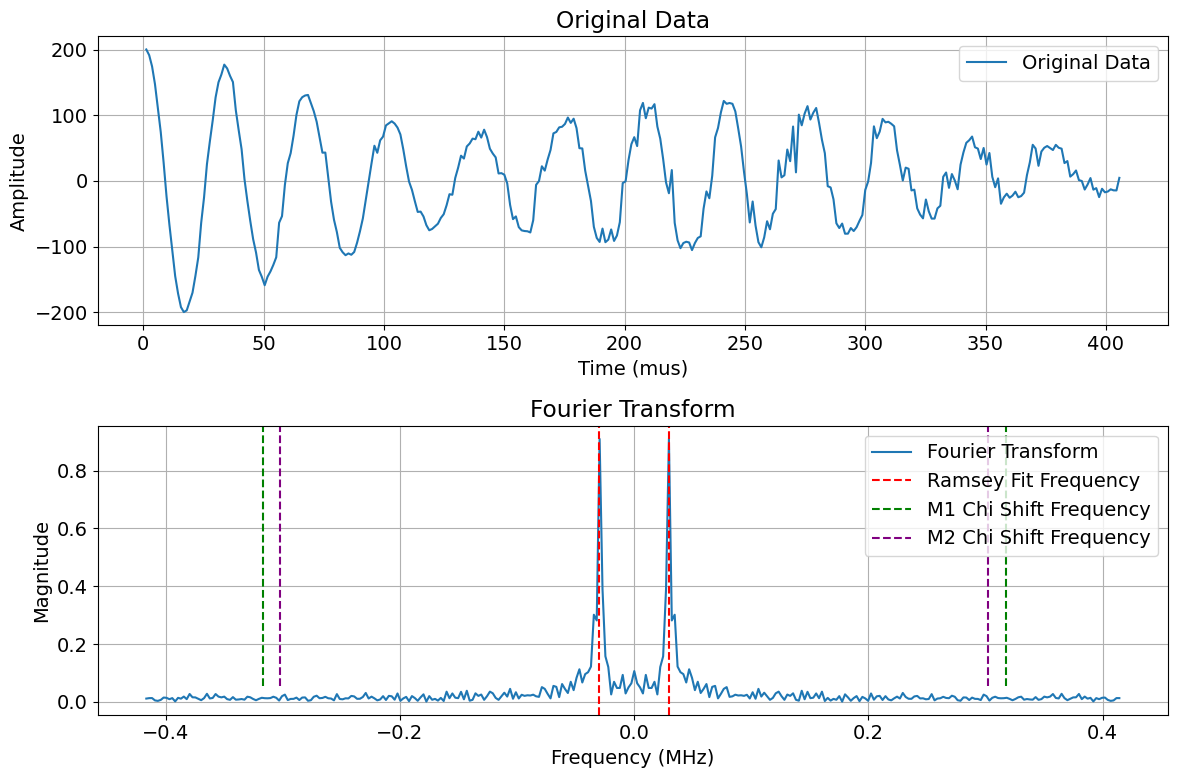

In [491]:
start_idx = 0
end_idx = -60
xdata = xdata_[start_idx:end_idx]
ydata = idata[start_idx:end_idx]


# Perform Fourier transform
ydata_fft = np.fft.fft(ydata)
frequencies = np.fft.fftfreq(len(ydata), d=(xdata[1] - xdata[0]))
# Sort the FFT data 
sorted_idx = np.argsort(frequencies)
frequencies = frequencies[sorted_idx]
ydata_fft = ydata_fft[sorted_idx]

# Plot the original data
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(xdata, ydata, label='Original Data')
plt.xlabel('Time (mus)')
plt.ylabel('Amplitude')
plt.title('Original Data')
plt.legend()
plt.grid(True)

# Plot the Fourier transform
plt.subplot(2, 1, 2)

plt.plot(frequencies, np.abs(ydata_fft) / max(ydata_fft), '-', label='Fourier Transform')

ramsey_fit_freq = attrs['config']['expt']['ramsey_freq']# 0.02 #0.21797037655105334
plt.axvline(x=ramsey_fit_freq, color='red', linestyle='--', label='Ramsey Fit Frequency')
plt.axvline(x=-ramsey_fit_freq, color='red', linestyle='--')

m1_chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][1])
m2_chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][2])  
chi_shift_ramsey_freq_m1 = ramsey_fit_freq + m1_chi
chi_shift_ramsey_freq_m2 = ramsey_fit_freq + m2_chi

plt.axvline(x=chi_shift_ramsey_freq_m1, color='green', linestyle='--', label='M1 Chi Shift Frequency', ymin = 0.1)
plt.axvline(x=-1 * chi_shift_ramsey_freq_m1, color='green', linestyle='--', ymin=0.1)
plt.axvline(x=chi_shift_ramsey_freq_m2, color='purple', linestyle='--', label='M2 Chi Shift Frequency', ymin = 0.1)
plt.axvline(x=-1 * chi_shift_ramsey_freq_m2, color='purple', linestyle='--', ymin=0.1)


plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


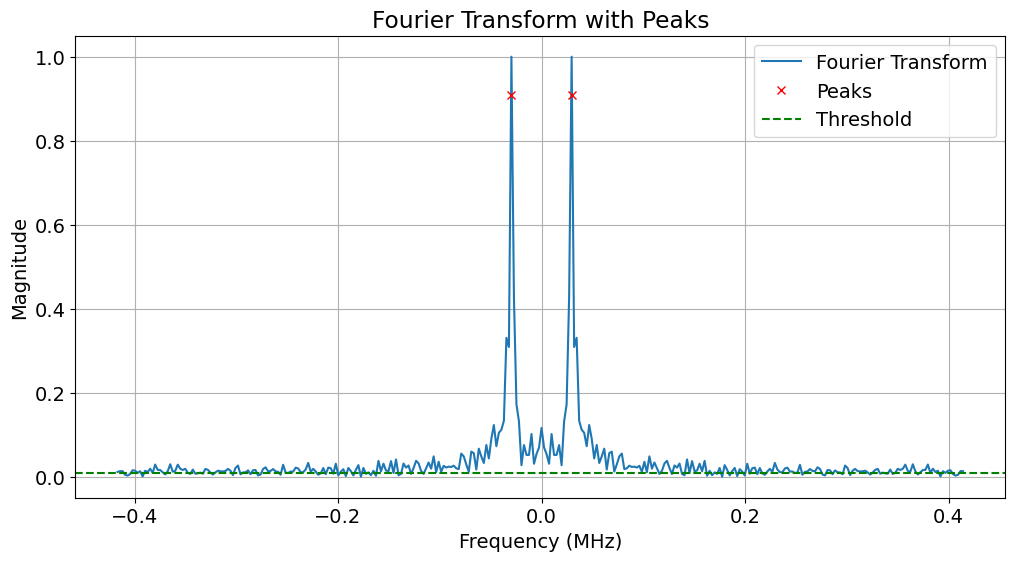

In [492]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming xdata and ydata are already defined
xdata = frequencies
ydata = np.abs(ydata_fft) / max(ydata_fft)

# Find peaks
peaks, _ = find_peaks(ydata, threshold=0.1)

# remove peaks around 0 freq
n_peaks = []
for peak in peaks: 
    if abs(xdata[peak]) > 0.01:
        n_peaks.append(peak)
n_peaks = np.array(n_peaks)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(xdata, np.abs(ydata), label='Fourier Transform')
plt.plot(xdata[n_peaks], ydata[n_peaks], 'rx', label='Peaks')  # Mark peaks with red 'x'

# add horizzontal line at 0.04
plt.axhline(y=0.01, color='g', linestyle='--', label='Threshold')

plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform with Peaks')
plt.legend()
plt.grid(True)
plt.show()

In [495]:
ramsey_peak_height = max(np.abs(ydata[n_peaks]))
ramsey_freq = frequencies[n_peaks][0]
print('Ramsey Peak Height:', ramsey_peak_height)
print('Ramsey Frequency:', ramsey_freq)

m1_chi =   np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][1])
m2_chi =   np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][2])

chi_shift_ramsey_freq_m1 = ramsey_freq + m1_chi
chi_shift_ramsey_freq_m2 = ramsey_freq + m2_chi

# find max height in range of 2 khz above and below the chi shift frequency
chi_shift_range = 2
chi_shift_range = chi_shift_range * 1e-3


def find_max_height(frequencies, ydata, freq, chi_shift_range): 
    '''
    Find the max height in the range of chi_shift_range above and below the frequency
    '''
    idx = np.where((frequencies > freq - chi_shift_range) & (frequencies < freq + chi_shift_range))
    idx2 = np.where((frequencies > -1*(freq - chi_shift_range)) & (frequencies < -1*(freq + chi_shift_range)))
    combined_idx = np.concatenate((idx[0], idx2[0]))
    max_height = np.max(np.abs(ydata[combined_idx]))
    max_idx = combined_idx[np.argmax(np.abs(ydata[combined_idx]))]
    return max_height, max_idx

def find_avg_height(frequencies, ydata,  freq, chi_shift_range): 
    '''
    Find the max height in the range of chi_shift_range above and below the frequency
    '''
    idx =  np.where((frequencies > freq - chi_shift_range) & (frequencies < freq + chi_shift_range))
    #idx2 = np.where((frequencies > -1*(freq -chi_shift_range)) & (frequencies < -1*(freq + chi_shift_range)))
    return np.mean((np.abs(ydata[idx]))), np.std(np.abs(ydata[idx])) #np.mean(np.concatenate((np.abs(ydata[idx]), np.abs(ydata[idx2])))

m1_avg_chi_shift_height, m1_err_chi_shift_height = find_avg_height(frequencies, ydata, chi_shift_ramsey_freq_m1, 0.05)
m1_chi_shift_height, m1_chi_shift_idx = find_max_height(frequencies, ydata, chi_shift_ramsey_freq_m1, chi_shift_range)
m2_chi_shift_height, m2_chi_shift_idx = find_max_height(frequencies, ydata, chi_shift_ramsey_freq_m2, chi_shift_range)

corrected_m1_chi_shift_height = m1_chi_shift_height - m1_avg_chi_shift_height
corrected_m2_chi_shift_height = m2_chi_shift_height - m1_avg_chi_shift_height
corrected_ramsey_peak_height = ramsey_peak_height - m1_avg_chi_shift_height

print('M1 Chi Shift Height:', m1_chi_shift_height)
print('M2 Chi Shift Height:', m2_chi_shift_height)

print('After correction')
print('M1 Chi Shift Height:', m1_chi_shift_height - m1_avg_chi_shift_height)
print('M2 Chi Shift Height:', m2_chi_shift_height - m1_avg_chi_shift_height)
print('Correction:',  m1_avg_chi_shift_height)

# frequencies

Ramsey Peak Height: 0.9999999999999999
Ramsey Frequency: -0.029585798816568053
M1 Chi Shift Height: 0.012536366933193138
M2 Chi Shift Height: 0.02248056007518265
After correction
M1 Chi Shift Height: -0.002244698650130869
M2 Chi Shift Height: 0.007699494491858642
Correction: 0.014781065583324007


In [456]:
# start_idx = 230
# end_idx = None
# plt.plot(frequencies[start_idx: end_idx], np.abs(ydata[start_idx:end_idx]) - m1_avg_chi_shift_height , '-', label='Fourier Transform')



# max_height, max_idx = find_max_height(frequencies, ydata - m1_avg_chi_shift_height, chi_shift_ramsey_freq_m1, chi_shift_range)
# plt.plot(frequencies[max_idx], max_height, 'rx', label='Max Height')

# plt.axvline(x=ramsey_freq + m1_chi, color='red', linestyle='--', label='Ramsey Frequency')
#plt.yscale('log')

In [462]:
# TAKE ratio of chi shift height to ramsey peak height
m1_chi_shift_ratio = corrected_m1_chi_shift_height / corrected_ramsey_peak_height
m2_chi_shift_ratio =   corrected_m2_chi_shift_height / corrected_ramsey_peak_height
m_err_shift_ratio = (m1_err_chi_shift_height) / corrected_ramsey_peak_height


# convert into temperature 
freq_to_mK = 48 # 1Ghz = 48mK

m1_freq = attrs['config']['device']['manipulate']['f_ge'][0] * 1e-3
m2_freq = attrs['config']['device']['manipulate']['f_ge'][1] * 1e-3
m_err_freq = 5 # 5 ghz



def find_temperature(n_thermal, frequency):
    ''' Use the formula n_thermal = 1/(exp(hf/kT) - 1) to find the temperature'''   
    freq_to_mK = 48 # 1Ghz = 48mK
    freq_temp = frequency * freq_to_mK
    temp_th = freq_temp / np.log((n_thermal + 1)/n_thermal)
    return temp_th

m1_temp_th = find_temperature(m1_chi_shift_ratio, m1_freq)
m2_temp_th = find_temperature(m2_chi_shift_ratio, m2_freq)
m_err_temp_th = find_temperature(m_err_shift_ratio, m_err_freq)

print('M1 Temp (mk):', m1_temp_th)
print('M2 Temp (mK):', m2_temp_th)
print('M2 Error Temp (mK):', m_err_temp_th)

# print thermal populations 
m1_n_th = m1_chi_shift_ratio
m2_n_th = m2_chi_shift_ratio
m_err_th = m_err_shift_ratio
print('M1 n_th (%):', m1_n_th * 100)
print('M2 n_th (%):', m2_n_th * 100)
print('M2 Error n_th (%):', m_err_th * 100)



M1 Temp (mk): 48.96014260387644
M2 Temp (mK): 41.35207035503895
M2 Error Temp (mK): 49.11592753353234
M1 n_th (%): 0.7606836411063611
M2 n_th (%): 0.25173807569598816
M2 Error n_th (%): 0.7605973025462279


In [414]:
1/(np.exp(5*48 / 50) - 1)

0.008298037801126508

In [153]:
m1_chi

0.28725

In [63]:
frequencies

array([ 0.        ,  0.00252016,  0.00504032,  0.00756048,  0.01008065,
        0.01260081,  0.01512097,  0.01764113,  0.02016129,  0.02268145,
        0.02520161,  0.02772177,  0.03024194,  0.0327621 ,  0.03528226,
        0.03780242,  0.04032258,  0.04284274,  0.0453629 ,  0.04788306,
        0.05040323,  0.05292339,  0.05544355,  0.05796371,  0.06048387,
        0.06300403,  0.06552419,  0.06804435,  0.07056452,  0.07308468,
        0.07560484,  0.078125  ,  0.08064516,  0.08316532,  0.08568548,
        0.08820565,  0.09072581,  0.09324597,  0.09576613,  0.09828629,
        0.10080645,  0.10332661,  0.10584677,  0.10836694,  0.1108871 ,
        0.11340726,  0.11592742,  0.11844758,  0.12096774,  0.1234879 ,
        0.12600806,  0.12852823,  0.13104839,  0.13356855,  0.13608871,
        0.13860887,  0.14112903,  0.14364919,  0.14616935,  0.14868952,
        0.15120968,  0.15372984,  0.15625   ,  0.15877016,  0.16129032,
        0.16381048,  0.16633065,  0.16885081,  0.17137097,  0.17

In [64]:
m1_chi - m2_chi

0.015110000000000012

In [75]:
m1_chi

0.28725

In [76]:
m2_chi

0.27214

# Fitting 2 frequencies

In [488]:
def connie_multifreq_ramsey( data=None, fit=True, fit_num_sin=1, attrs = None,  
                   active_reset = False, threshold = -20, readouts_per_rep = 4,  title='Ramsey', ramsey_freq=None):
    
    # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset]
    # fitparams=[yscale0, freq0, phase_deg0, decay0, yscale1, freq1, phase_deg1, y0] # two fit freqs
    # fitparams=[yscale0, freq0, phase_deg0, decay0, y00, x00, yscale1, freq1, phase_deg1, y01, yscale2, freq2, phase_deg2, y02] # three fit freqs

    # Remove the first and last point from fit in case weird edge measurements

    if active_reset:
        Ilist, Qlist = post_select_raverager_data(data, attrs, threshold, readouts_per_rep)
        data['avgi'] = Ilist
        data['avgq'] = Qlist
        data['xpts'] = data['xpts'][:-1]
        data['amps'] = data['amps'][:-1] # adjust since active reset throws away the last data point

    fitparams = None
    if fit_num_sin == 2:
        fitfunc = fitter.fittwofreq_decaysin
        fitparams = [None] * 8
        fitparams[1] = ramsey_freq
        fitparams[3] = 15  # decay
        fitparams[4] = 0.05  # yscale1 (ratio relative to base oscillations)
        fitparams[5] = 1 / 12.5  # freq1
        # print('FITPARAMS', fitparams[7])
    elif fit_num_sin == 3:
        fitfunc = fitter.fitthreefreq_decaysin
        fitparams = [None] * 14
        fitparams[1] = ramsey_freq
        fitparams[3] = 15  # decay
        fitparams[6] = 1.1  # yscale1
        fitparams[7] = 0.415  # freq1
        fitparams[-4] = 1.1  # yscale2
        fitparams[-3] = 0.494  # freq2
        # print('FITPARAMS', fitparams[7])
    else:
        fitfunc = fitter.fitdecaysin
        fitparams = [None, ramsey_freq, 0, None, None]
    p_avgi, pCov_avgi = fitfunc(data["xpts"][:-1], data["avgi"][:-1], fitparams=fitparams)
    p_avgq, pCov_avgq = fitfunc(data["xpts"][:-1], data["avgq"][:-1], fitparams=fitparams)
    p_amps, pCov_amps = fitfunc(data["xpts"][:-1], data["amps"][:-1], fitparams=fitparams)
    data["fit_avgi"] = p_avgi
    data["fit_avgq"] = p_avgq
    data["fit_amps"] = p_amps
    data["fit_err_avgi"] = pCov_avgi
    data["fit_err_avgq"] = pCov_avgq
    data["fit_err_amps"] = pCov_amps

    # print('p avgi', p_avgi)
    # print('p avgq', p_avgq)
    # print('p amps', p_amps)

    return data

Attempted to init fitparam 1 to 0.07293762575452717, which is out of bounds 0.00025201612903225806 to 0.03780241935483871. Instead init to 0.019027217741935484
Attempted to init fitparam 1 to 0.07293762575452717, which is out of bounds 0.00025201612903225806 to 0.03780241935483871. Instead init to 0.019027217741935484
Current pi pulse frequency: 3500
Fit frequency from I [MHz]: 0.022128784673029114 +/- 0.0040380983433288605
Suggested new pi pulse frequency from fit I [MHz]:
 	3499.997871215327
 	3500.042128784673
T2 Ramsey from fit I [us]: 119.04
Fit frequency from Q [MHz]: 0.015503981385367786 +/- 0.0010016486059185414
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3500.0044960186146
 	3500.0355039813853
T2 Ramsey from fit Q [us]: 119.04000000042609


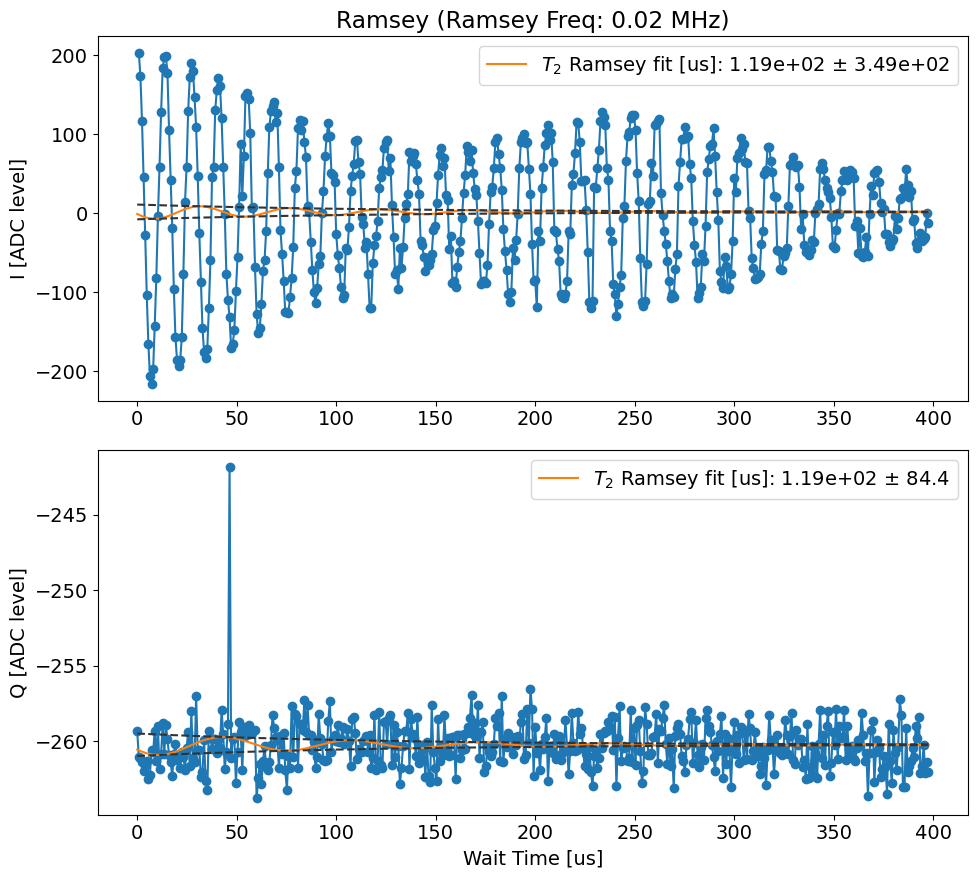

In [489]:
temp_data, attrs = prev_data(expt_path, '00015_RamseyExperiment.h5')
p, pCov, xdata_, idata = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=True, threshold = -25.73026268397916, readouts_per_rep=4,)
                                        

freq0 (MHz) 0.028589264892365646
freq1 (MHz) 0.018910317691146462


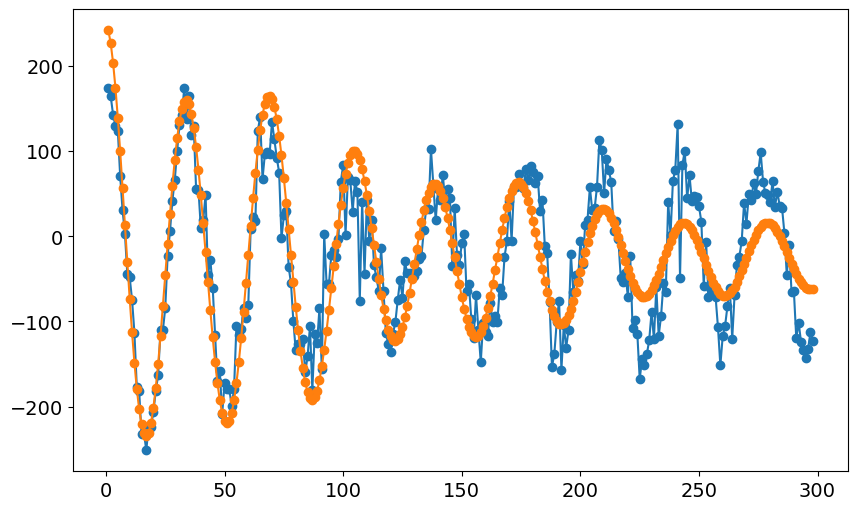

In [218]:
ramsey_freq = attrs['config']['expt']['ramsey_freq']

fitfunc = fitter.fittwofreq_decaysin
func = fitter.twofreq_decaysin
fitparams = [None] * 8
fitparams[1] = ramsey_freq
fitparams[5] = 0.02  # decay
# fitparams[1] = ramsey_freq
# fitparams[3] = 15  # decay
# fitparams[4] = 0.05  # yscale1 (ratio relative to base oscillations)
# fitparams[5] = 1 / 12.5  # freq1
# print('FITPARAMS', fitparams[7])
   
p_avgi, pCov_avgi = fitfunc(xdata_[:-1], idata[:-1], fitparams=fitparams)
    
plt.plot(xdata_, idata, '-o', label='original')
# plot fit 

plt.plot(xdata_, func(xdata_, *p_avgi), '-o', label='fit')

yscale0, freq0, phase_deg0, decay0, yscale1, freq1, phase_deg1, y0 = p_avgi
#print the 2 frequencies 
print('freq0 (MHz)', freq0)
print('freq1 (MHz)', freq1)

freq0 (MHz) 0.0724541930055813
freq1 (MHz) 0.011522811770509797


In [196]:
p_avgi

array([3.14726256e+02, 7.24703783e-02, 9.28782306e+01, 1.56961672e+02,
       1.33993021e-01, 4.99494245e-01, 9.55517022e+01, 1.98840277e+00])

In [190]:
len(idata)

497

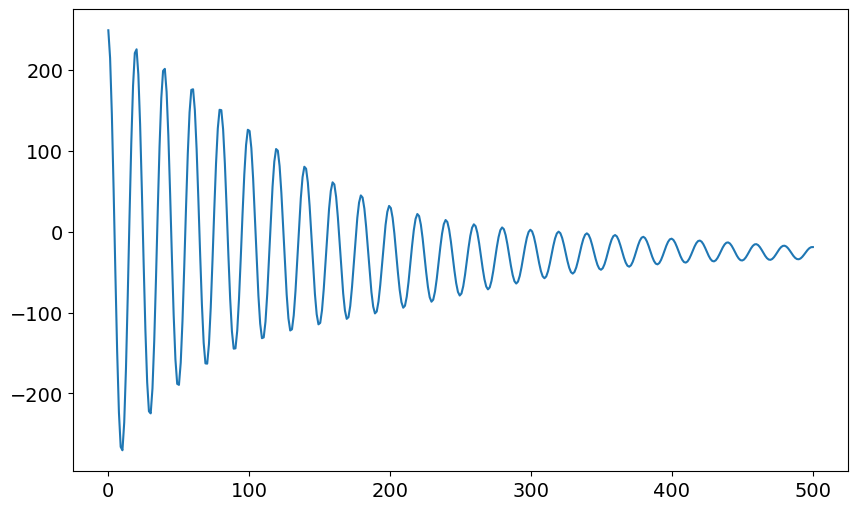

In [225]:
xpts = np.linspace(0, 500, 400)
freq1 = 0.003
freq0 = 0.05

ypts = y0 + np.exp(-xpts / decay0) * yscale0 * (
        (1 - yscale1) * np.sin(2 * np.pi * freq0 * xpts + phase_deg0 * np.pi / 180)
        + yscale1 * np.sin(2 * np.pi * freq1 * xpts + phase_deg1 * np.pi / 180) )

plt.plot(xpts, ypts)

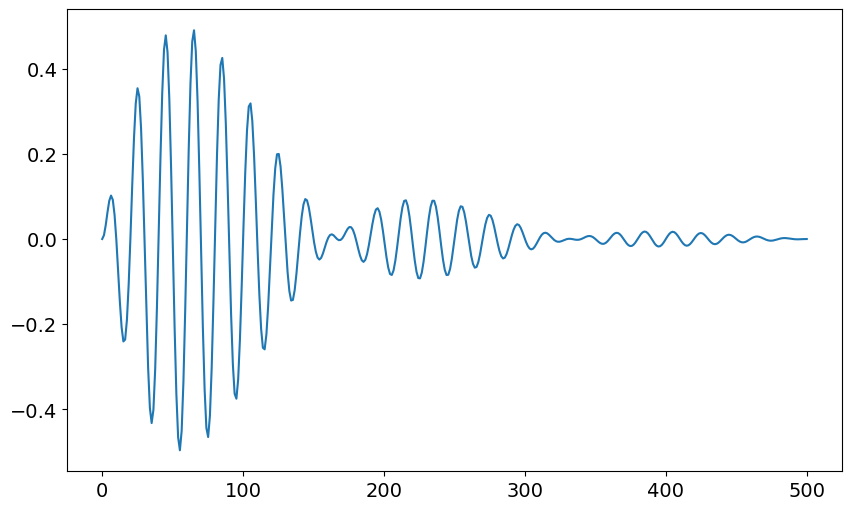

In [236]:
freq0 = 0.05
freq1 = 0.003
kappa = 0.01
ypts = np.exp(-1 * kappa * xpts) * np.sin(2 * np.pi * freq0 * xpts) * np.sin(2 * np.pi * freq1 * xpts)
plt.plot(xpts, ypts)

In [ ]:
# Cav

# Cavity Echo

## Bare Cavity Ramsey

Attempted to init fitparam 1 to 0.09948979591836733, which is out of bounds 0.0002577319587628866 to 0.03865979381443299. Instead init to 0.01945876288659794
Current pi pulse frequency: 1977.7
Fit frequency from I [MHz]: 0.02815112450419972 +/- 3.055475457858857e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	1975.0281511245043
 	1974.9718488754959
T2 Ramsey from fit I [us]: 220.5796845845649
Fit frequency from Q [MHz]: 0.016172663362036634 +/- 0.001284221098500477
Suggested new pi pulse frequencies from fit Q [MHz]:
 	1975.016172663362
 	1974.9838273366381
T2 Ramsey from fit Q [us]: 125.55899693772615


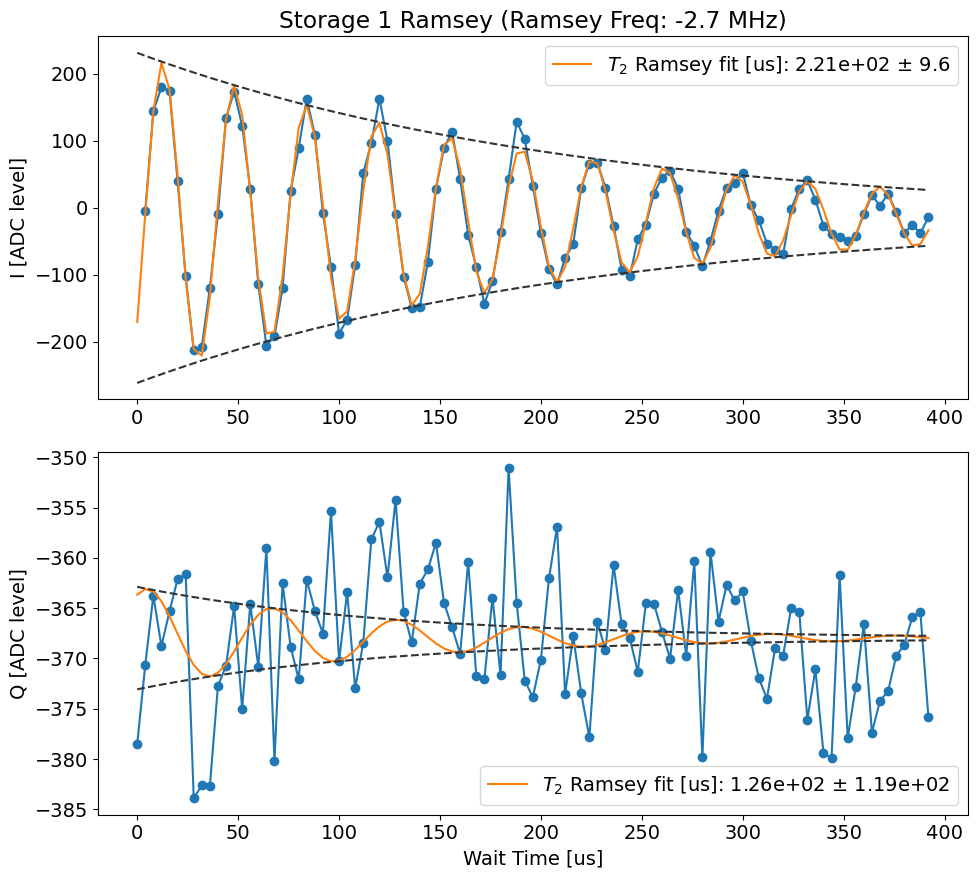

In [698]:
temp_data, attrs = prev_data(expt_path, '00098_CavityRamseyExperiment.h5')
temp_data, attrs = prev_data(expt_path, '00163_CavityRamseyExperiment.h5') # with echo
# temp_data, attrs = prev_data(expt_path, '00207_CavityRamseyExperiment.h5')
# temp_data, attrs = prev_data(expt_path, '00006_cavity_ramsey_with_spectators.h5')
mode_no = attrs['config']['expt']['storage_ramsey'][1]
return_args = Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=True, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, #[500, None, None, None, None, None],
                 title=f'Storage {mode_no} Ramsey')
p, pCov, xdata_1, idata1 = return_args

Current pi pulse frequency: 1977.7
Fit frequency from I [MHz]: 0.02767707207387102 +/- 3.8122882398260626e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	1975.0276770720739
 	1974.9723229279261
T2 Ramsey from fit I [us]: 222.71522744622388
Fit frequency from Q [MHz]: 0.038659793814431964 +/- 0.0006389516635066934
Suggested new pi pulse frequencies from fit Q [MHz]:
 	1975.0386597938145
 	1974.9613402061857
T2 Ramsey from fit Q [us]: 276.0354278446926


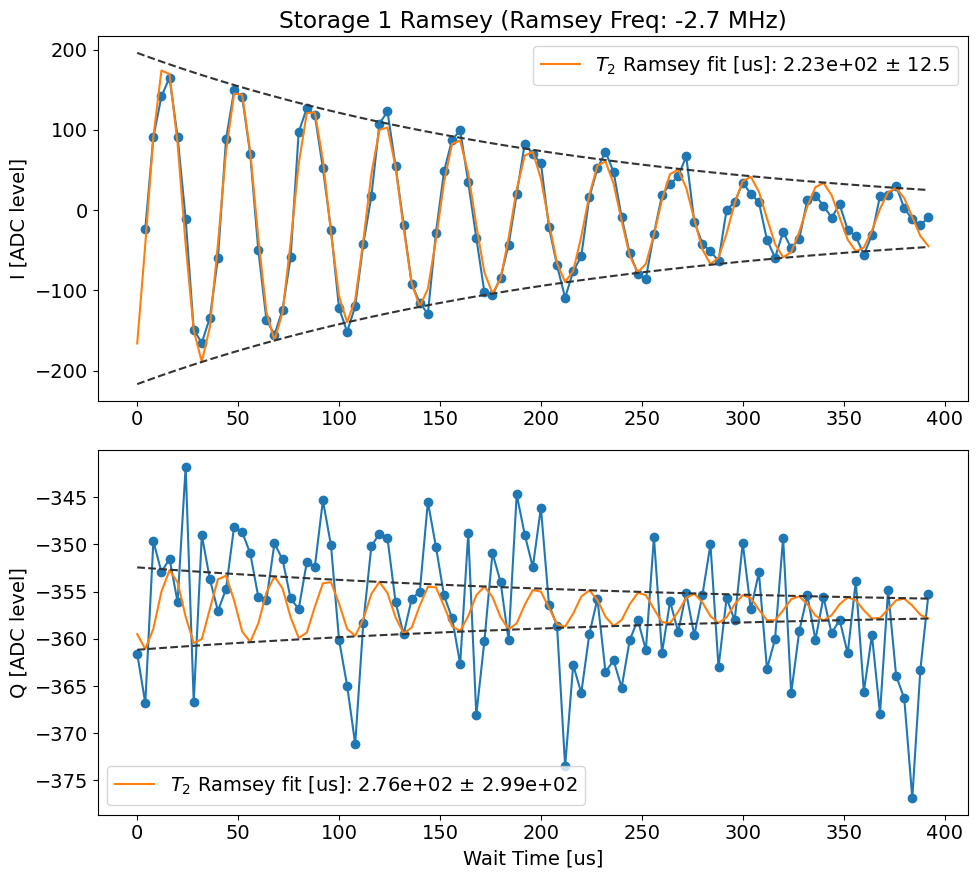

In [699]:
temp_data, attrs = prev_data(expt_path, '00098_CavityRamseyExperiment.h5')
temp_data, attrs = prev_data(expt_path, '00163_CavityRamseyExperiment.h5') # with echo
# temp_data, attrs = prev_data(expt_path, '00207_CavityRamseyExperiment.h5')
temp_data, attrs = prev_data(expt_path, '00006_cavity_ramsey_with_spectators.h5')
mode_no = attrs['config']['expt']['storage_ramsey'][1]
return_args = Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=True, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, #[500, None, None, None, None, None],
                 title=f'Storage {mode_no} Ramsey')
p, pCov, xdata_2, idata2 = return_args

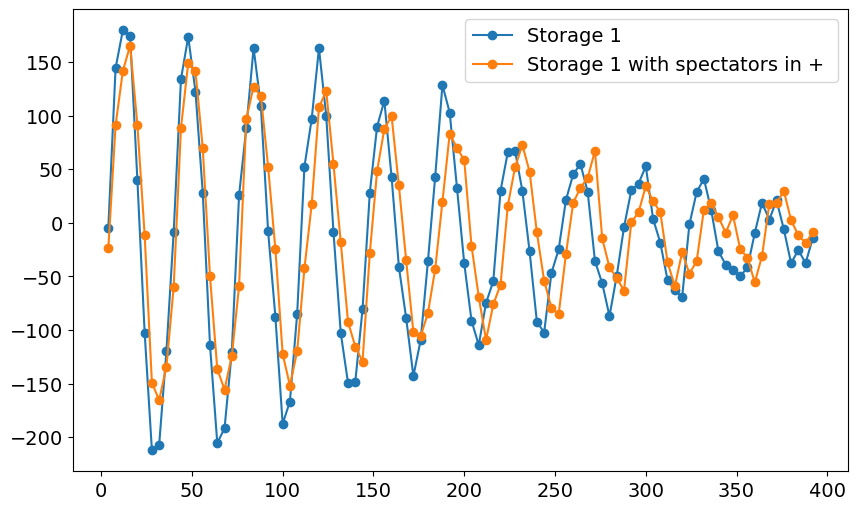

In [701]:
plt.plot(xdata_1, idata1, '-o', label='Storage 1')
plt.plot(xdata_2, idata2, '-o', label='Storage 1 with spectators in + ')
plt.legend()

In [682]:
return_args

(array([ 2.84230150e+02,  2.76770721e-02, -4.90864625e+01,  2.22715227e+02,
        -1.05326152e+01, -7.12287238e+01]),
 array([[ 4.47585870e+16, -1.97836503e+02, -5.26476198e+06,
         -5.68662541e+08,  3.83554237e+06, -3.50716443e+16],
        [-1.97836503e+02,  1.45335416e-09, -5.17581535e-05,
         -9.19851436e-06,  2.80904886e-06,  1.55019460e+02],
        [-5.26476198e+06, -5.17581535e-05,  3.27586372e+00,
          6.79235609e-01, -1.24760285e-01,  4.12532753e+06],
        [-5.68662541e+08, -9.19851436e-06,  6.79235609e-01,
          1.57300610e+02,  7.64496758e-01,  4.45588800e+08],
        [ 3.83554237e+06,  2.80904886e-06, -1.24760285e-01,
          7.64496758e-01,  2.58568708e+00, -3.00543040e+06],
        [-3.50716443e+16,  1.55019460e+02,  4.12532753e+06,
          4.45588800e+08, -3.00543040e+06,  2.74812124e+16]]),
 array([  4.01,   8.01,  12.01,  16.01,  20.01,  24.01,  28.01,  32.01,
         36.01,  40.01,  44.01,  48.01,  52.01,  56.01,  60.01,  64.01,
        

In [591]:
attrs['config']['expt']['echoes'][1]

1

# parity detection temperature

## Manipulate 1

In [52]:
temp_data, attrs = prev_data(expt_path, '00003_ParityTempExperiment.h5')
aa, bb = parity_temp_display(temp_data, attrs, active_reset=False, threshold = -63.47477176210509, readouts_per_rep=25)

In [44]:
nn = 0
for i in range(len(aa['idata'])//28):
    if aa['idata'][i*28+2]> -63: nn+=1
print(nn)

727


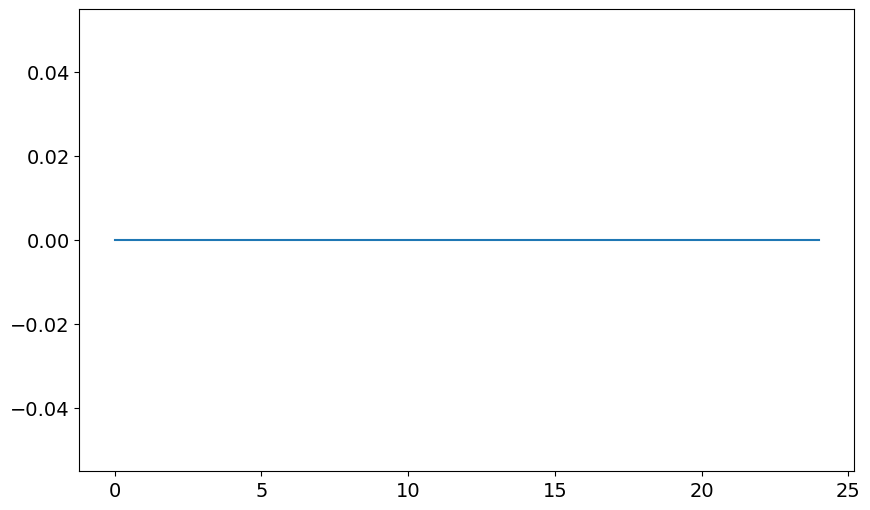

In [55]:
n = 1000
plt.plot(bb[n])

In [68]:
temp_data, attrs = prev_data(expt_path, '00004_ParityTempExperiment.h5')
aa, bb = parity_temp_display(temp_data, attrs, active_reset=False, threshold = -63.47477176210509, readouts_per_rep=25)

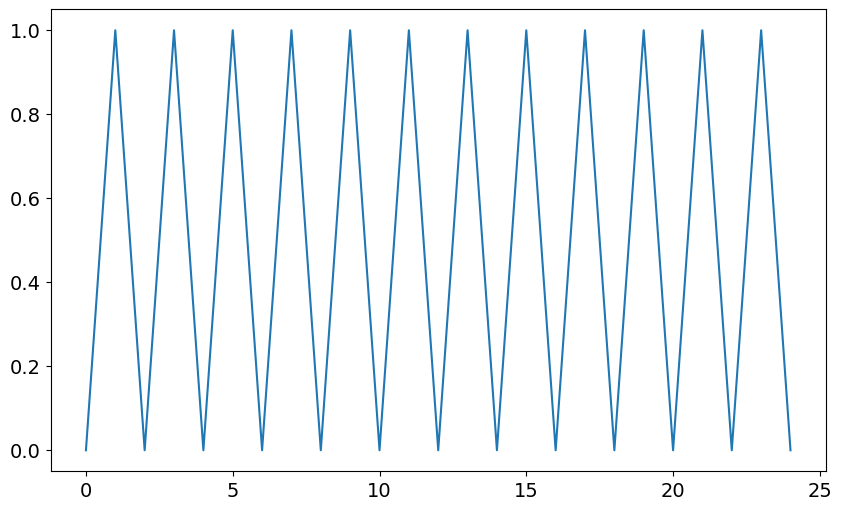

In [78]:
n = 1250
plt.plot(bb[n])

In [64]:
len(bb)

10000